In [116]:
# import dataiku
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import time
from numerize import numerize

import warnings
warnings.filterwarnings('ignore')

In [6]:
import sys
sys.path.append("C:/Users/w510663/Desktop/Pyri/connections/")
from conn import snowflake_conn

# Get execution time
st = time.time()

conn = snowflake_conn()
cur = conn.cursor()

cur.execute('''
    SELECT *
    FROM "DATAIKU_ANALYTICS_SUB"."RISK_FRAUD"."RDS_NAF_PM_INCLUSION_ACCT_SCORING"
    WHERE YEAR(REF_DATE) IN (2021,2022)
;
''')
inclusion = pd.DataFrame.from_records(iter(cur), columns=[x[0] for x in cur.description])

et = time.time()
elapsed_time = et - st
print('Data Shape:', inclusion.shape, 
      '\nExecution time:', elapsed_time / 60, 'minutes')

inclusion.head()

Failed to import ArrowResult. No Apache Arrow result set format can be used. ImportError: DLL load failed while importing arrow_iterator: The specified procedure could not be found.


Initiating login request with your identity provider. A browser window should have opened for you to complete the login. If you can't see it, check existing browser windows, or your OS settings. Press CTRL+C to abort and try again...
Going to open: https://myapps.wexinc.com/app/snowflake/exkaea789nRrm6HV7357/sso/saml?SAMLRequest=pZNLb%2BIwFEb%2FSuRZJ3ZS2oBFqGgRBfUxiEc1mp2bXKiFYwdfh8C%2FHxPKqLNoN7NznHPt4%2FvZ%2FdtDqYI9WJRGZySOGAlA56aQepOR1XIcdkmATuhCKKMhI0dAcjvooyhVxYe1e9dz2NWALvALaeTtj4zUVnMjUCLXogTkLueL4fMTTyLGK2ucyY0in0q%2BrxCIYJ03vJQUKL3eu3MVp7Rpmqi5iozd0IQxRlmPeuqE%2FLjwB3%2BmL%2FiYss6J94THZx9ud1KfW%2FCd1tsZQj5ZLmfh7OdiSYLhRfXeaKxLsAuwe5nDav50FkBv8LYTLO12WFRj2PjehUlUWbkXDpTU2wi1adZKbCE3ZVU7v0XkR3QNBVVmI30XpqOMVFtZbK73k11V9NKHX%2BPHejY2jw0c7zZNZzKZVyjGdf7w9KIOq6bs5iR4vcScnGKeItYw1adwnZ9iSSdkScjSZcJ40uUsjm7i5DcJRl5QauHayssJyqOoKowaOEidt3b%2Bm%2F4Vp3DYChBpt6fntryZvKZX1ylFNPQUNjnfH94a2MF%2FdaVPPy%2F1cS9ffFTT0cwomR%2BDsbGlcF8nGUdxOyOLcN2iHEoh1bAoLCD6RJUyzb0F75ERZ2sgdHDe9d8HMPgD&RelaySta

,CUST_ID,SETID,REF_DATE,A_NAICS_2_DIGIT_C,A_TENURE_MONTHS_N,A_FLAG_REVOLVER_B,A_YEARS_IN_BUSINESS_APP_N,A_FLEET_SIZE_APP_N,D_SPREAD_EXPOSURE_6M_N,D_MAX_DAYS_PAST_DUE_6M_N,...,EXCL_FRAUD_FLAG,EXCL_EFPS_FLAG,WX_CUST_SUSP_CLASS,GOVERNMENT_FLG,WX_CR_RATING_DATE_TO_REF_DATE,EARLIEST_ACTIVE_DATE_TO_REF_DATE,ALL_EXCL_FLAGS_SUM,RETRAIN_EXCL_FLAGS_SUM,EXCL_FLAG_GROUP,CR_LIMIT
0,6300015883236,IOL,2022-08-01 00:00:00-07:00,Un,226,0,NaN,NaN,0.437020,0.0,...,0,0,X,N,6774,577.0,0,0,Inclusion,405.85
1,9100005747985,REV,2022-08-01 00:00:00-07:00,51,46,1,NaN,NaN,2.892560,22.0,...,0,0,O,N,1376,577.0,0,0,Inclusion,2500.00
2,9100010269099,WXC,2022-08-01 00:00:00-07:00,53,6,0,NaN,NaN,1.029567,0.0,...,0,0,O,N,178,140.0,0,0,Inclusion,3504.36
3,9100010020465,WXB,2022-08-01 00:00:00-07:00,81,8,0,NaN,NaN,1.730682,7.0,...,0,0,O,N,248,139.0,0,0,Inclusion,4400.00
4,9100006823395,CHV,2022-08-01 00:00:00-07:00,56,44,0,NaN,NaN,1.598594,0.0,...,0,0,O,N,1334,577.0,0,0,Inclusion,1500.00


In [7]:
# Get execution time
st = time.time()

cur.execute('''
    SELECT *
    FROM "DATAIKU_ANALYTICS_SUB"."RISK_FRAUD"."RDS_NAF_PM_SCOPE_EXCLUSION_ACCT_SCORING"
    WHERE YEAR(REF_DATE) IN (2021,2022)
;
''')
exclusion = pd.DataFrame.from_records(iter(cur), columns=[x[0] for x in cur.description])

et = time.time()
elapsed_time = et - st
print('Data Shape:', exclusion.shape, 
      '\nExecution time:', elapsed_time / 60, 'minutes')

exclusion.head()

Data Shape: (577420, 53) 
Execution time: 0.5049640695254008 minutes


,CUST_ID,SETID,REF_DATE,A_NAICS_2_DIGIT_C,A_TENURE_MONTHS_N,A_FLAG_REVOLVER_B,A_YEARS_IN_BUSINESS_APP_N,A_FLEET_SIZE_APP_N,D_SPREAD_EXPOSURE_6M_N,D_MAX_DAYS_PAST_DUE_6M_N,...,EXCL_FRAUD_FLAG,EXCL_EFPS_FLAG,WX_CUST_SUSP_CLASS,GOVERNMENT_FLG,WX_CR_RATING_DATE_TO_REF_DATE,EARLIEST_ACTIVE_DATE_TO_REF_DATE,ALL_EXCL_FLAGS_SUM,RETRAIN_EXCL_FLAGS_SUM,EXCL_FLAG_GROUP,CR_LIMIT
0,9100004264821,FSC,2022-01-01 00:00:00-08:00,54,57,0,NaN,NaN,0.217943,0.0,...,0,1,O,N,1698,365.0,1,0,EFPS,9200.0
1,9100008993043,FSC,2022-01-01 00:00:00-08:00,72,9,0,NaN,2.0,1.842599,0.0,...,0,1,O,N,277,276.0,1,0,EFPS,1300.0
2,9100007434666,FSC,2022-01-01 00:00:00-08:00,23,29,0,NaN,75.0,0.135066,0.0,...,0,0,O,N,864,365.0,1,0,Large Credit Limit,150000.0
3,9100008120169,FSC,2022-01-01 00:00:00-08:00,22,23,0,NaN,34.0,0.242340,0.0,...,0,0,K,N,684,365.0,1,0,VIP,15200.0
4,9100002254824,FSC,2022-01-01 00:00:00-08:00,23,104,0,NaN,NaN,0.765475,0.0,...,0,1,O,N,3125,365.0,1,0,EFPS,2200.0


In [8]:
from conn import snowflake_bcg_eng_conn

# Get execution time
st = time.time()

conn = snowflake_bcg_eng_conn()
cur = conn.cursor()

cur.execute('''
    WITH PPLSOFT_AGING_TABLE AS (
        SELECT CUST_ID,
            DATE_TRUNC('MONTH', BUSINESS_DATE)::DATE BUSINESS_MONTH, BUSINESS_DATE,
            ADD_MONTHS(BUSINESS_MONTH, -12) BUSINESS_DATE_TO_LINK,
            WX_AGE99, WX_EIPP_BALANCE, WX_AGE99 + WX_EIPP_BALANCE TOTAL_EXPOSURE
        FROM "PREP"."FIN__SYSADM_ARCH"."PS_WX_CUST_DAILY_ARCH"
        WHERE YEAR(BUSINESS_DATE) BETWEEN 2022 AND 2023
        
        UNION
        SELECT CUST_ID,
            DATE_TRUNC('MONTH', BUSINESS_DATE)::DATE BUSINESS_MONTH, BUSINESS_DATE,
            ADD_MONTHS(BUSINESS_MONTH, -12) BUSINESS_DATE_TO_LINK,
            WX_AGE99, WX_EIPP_BALANCE, WX_AGE99 + WX_EIPP_BALANCE TOTAL_EXPOSURE
        FROM "PREP"."FIN__SYSADM_ARCH"."PS_WX_CSTDAY_ARCH"
        WHERE YEAR(BUSINESS_DATE) BETWEEN 2022 AND 2023
        
        UNION
        SELECT CUST_ID,
            DATE_TRUNC('MONTH', BUSINESS_DATE)::DATE BUSINESS_MONTH, BUSINESS_DATE,
            ADD_MONTHS(BUSINESS_MONTH, -12) BUSINESS_DATE_TO_LINK,
            WX_AGE99, WX_EIPP_BALANCE, WX_AGE99 + WX_EIPP_BALANCE TOTAL_EXPOSURE
        FROM "PREP"."FIN__SYSADM"."PS_WX_CUST_DAILY"
        WHERE YEAR(BUSINESS_DATE) BETWEEN 2022 AND 2023
    )
            
    SELECT *
    FROM PPLSOFT_AGING_TABLE
    QUALIFY ROW_NUMBER() OVER (PARTITION BY CUST_ID, DATE_TRUNC('MONTH', BUSINESS_DATE) ORDER BY BUSINESS_DATE DESC) = 1
    ;
''')
loss_rate = pd.DataFrame.from_records(iter(cur), columns=[x[0] for x in cur.description])

et = time.time()
elapsed_time = et - st
print('Data Shape:', loss_rate.shape, 
      '\nExecution time:', elapsed_time / 60, 'minutes')

loss_rate.head()

Data Shape: (15170367, 7) 
Execution time: 15.338089350859324 minutes


,CUST_ID,BUSINESS_MONTH,BUSINESS_DATE,BUSINESS_DATE_TO_LINK,WX_AGE99,WX_EIPP_BALANCE,TOTAL_EXPOSURE
0,9100007881264,2023-01-01,2023-01-31,2022-01-01,195.51,718.01,913.52
1,9100005036643,2023-05-01,2023-05-31,2022-05-01,428.08,294.22,722.30
2,9100009997587,2022-01-01,2022-01-31,2021-01-01,2375.70,2313.88,4689.58
3,9100007598637,2023-01-01,2023-01-19,2022-01-01,0.00,0.00,0.00
4,9100012322800,2022-10-01,2022-10-31,2021-10-01,3019.00,7361.45,10380.45


In [9]:
incl_acct = inclusion.copy()

# make ref_date to date
incl_acct['REF_DATE'] = pd.to_datetime(incl_acct['REF_DATE'], utc=True).dt.date

# joing loss_rate with inclusion
incl_acct = incl_acct.merge(loss_rate, how='left', left_on=['CUST_ID', 'REF_DATE'], right_on=['CUST_ID', 'BUSINESS_DATE_TO_LINK'])

incl_acct.shape

(5108662, 59)

In [10]:
excl_acct = exclusion.copy()

# make ref_date to date
excl_acct['REF_DATE'] = pd.to_datetime(excl_acct['REF_DATE'], utc=True).dt.date

# joing loss_rate with inclusion
excl_acct = excl_acct.merge(loss_rate, how='left', left_on=['CUST_ID', 'REF_DATE'], right_on=['CUST_ID', 'BUSINESS_DATE_TO_LINK'])

excl_acct.shape

(577420, 59)

In [11]:
# Drop model unused from the dataset
cols_to_drop = ['SETID', 'A_BUSINESS_PROGRAM_C', 'A_MARKETING_CHANNEL_C', 'A_PORTFOLIO_C',
                'FLAG_90_DPD_366_DAYS', 'FLAG_CHARGEOFF_366_DAYS', 'proba_0',
                'EXCL_PORTFOLIO_FLAG', 'EXCL_CUST_STATUS_FLAG', 'EXCL_CUST_TENURE_FLAG',
                'EXCL_DUMMY_CREDIT_LIMIT_FLAG', 'EXCL_MATERIAL_DELINQUENCY_FLAG',
                'EXCL_CUST_CONVERSION_FLAG', 'EXCL_FRAUD_FLAG', 'WX_CR_RATING_DATE_TO_REF_DATE', 'EARLIEST_ACTIVE_DATE_TO_REF_DATE',
                'ALL_EXCL_FLAGS_SUM', 'RETRAIN_EXCL_FLAGS_SUM',
                'EXCL_GOV_VIP_FLAG', 'EXCL_LARGE_CREDIT_LIMIT_FLAG', 'EXCL_EFPS_FLAG', 'WX_CUST_SUSP_CLASS', 'GOVERNMENT_FLG',
                'BUSINESS_MONTH', 'BUSINESS_DATE', 'BUSINESS_DATE_TO_LINK', 'WX_AGE99', 'WX_EIPP_BALANCE',
]

cols_rename_map = {'CUST_ID': 'ID',
                   'FLAG_60_DPD_366_DAYS': 'target',
                   'proba_1': 'y_pred_proba',
                   'prediction': 'y_pred',
                   'TOTAL_EXPOSURE': 'TOTAL_EXPOSURE_12M',
}


incl_acct = incl_acct.drop(cols_to_drop, axis=1)
incl_acct.rename(cols_rename_map, axis=1, inplace=True)

excl_acct = excl_acct.drop(cols_to_drop, axis=1)
excl_acct.rename(cols_rename_map, axis=1, inplace=True)


gov = excl_acct[excl_acct['EXCL_FLAG_GROUP'] == 'GOV']

vip = excl_acct[excl_acct['EXCL_FLAG_GROUP'] == 'VIP']

efps = excl_acct[excl_acct['EXCL_FLAG_GROUP'] == 'EFPS']

large_credit = excl_acct[excl_acct['EXCL_FLAG_GROUP'] == 'Large Credit Limit'] 


# print out the shape of each dataframe
print('Inclusion:', incl_acct.shape)
print('Government:', gov.shape)
print('VIP Non-Government:', vip.shape)
print('EPFS:', efps.shape)
print('Large Credit:', large_credit.shape)

Inclusion: (5108662, 31)
Government: (230315, 31)
VIP Non-Government: (46859, 31)
EPFS: (254926, 31)
Large Credit: (45320, 31)


In [12]:
# union all dataframes
df_combine = pd.concat([incl_acct, gov, vip, efps, large_credit])
df_combine.head()

,ID,REF_DATE,A_NAICS_2_DIGIT_C,A_TENURE_MONTHS_N,A_FLAG_REVOLVER_B,A_YEARS_IN_BUSINESS_APP_N,A_FLEET_SIZE_APP_N,D_SPREAD_EXPOSURE_6M_N,D_MAX_DAYS_PAST_DUE_6M_N,D_MAX_EXPOSURE_1M_N,...,T_SPREAD_GROSS_SPEND_6M_N,T_SPREAD_TOTAL_TRX_6M_N,T_SUM_GALLONS_1M_N,T_SPREAD_SUM_GALLONS_6M_N,target,y_pred_proba,y_pred,EXCL_FLAG_GROUP,CR_LIMIT,TOTAL_EXPOSURE_12M
0,6300015883236,2022-08-01,Un,226,0,NaN,NaN,0.437020,0.0,261.07,...,1.451934,1.285714,0.000,1.493583,0,0.002457,0,Inclusion,405.85,NaN
1,9100005747985,2022-08-01,51,46,1,NaN,NaN,2.892560,22.0,404.94,...,1.578457,1.826087,65.690,1.880547,0,0.065345,0,Inclusion,2500.00,983.08
2,9100010269099,2022-08-01,53,6,0,NaN,NaN,1.029567,0.0,1797.76,...,1.551642,1.578947,200.903,1.468707,0,0.009211,0,Inclusion,3504.36,1076.57
3,9100010020465,2022-08-01,81,8,0,NaN,NaN,1.730682,7.0,1689.14,...,2.205425,1.950000,258.875,2.269463,0,0.035139,0,Inclusion,4400.00,976.47
4,9100006823395,2022-08-01,56,44,0,NaN,NaN,1.598594,0.0,93.10,...,2.131671,1.500000,10.896,2.073028,0,0.009004,0,Inclusion,1500.00,71.04


### Calculate Loss Rate by Group and Month

In [13]:
# when target == 1 then the new column = total_exposure_12m else 0
df_combine['TOTAL_EXPOSURE_12M_DEFAULT'] = np.where(df_combine['target'] == 1, df_combine['TOTAL_EXPOSURE_12M'], 0)

daily_summary = df_combine.groupby(['REF_DATE', 'EXCL_FLAG_GROUP']).agg({ 'TOTAL_EXPOSURE_12M':'sum',
                                                                          'TOTAL_EXPOSURE_12M_DEFAULT': 'sum',
                                                                        }).reset_index()

# daily_summary['LOSS_RATE'] = daily_summary['TOTAL_EXPOSURE_12M_DEFAULT'] / daily_summary['TOTAL_EXPOSURE_12M']

# pivot table
daily_summary = pd.pivot_table(daily_summary, values=['TOTAL_EXPOSURE_12M', 'TOTAL_EXPOSURE_12M_DEFAULT'],
                               index='REF_DATE', columns='EXCL_FLAG_GROUP', 
                               )

# daily_summary['TOTAL_EXPOSURE_12M_ALL'] = df_combine.groupby('REF_DATE')['TOTAL_EXPOSURE_12M'].sum()

# change TOTAL_EXPOSURE_12M to dont show scientific notation

pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_rows', None)
daily_summary

TOTAL_EXPOSURE_12M                             \
EXCL_FLAG_GROUP               EFPS          GOV     Inclusion   
REF_DATE                                                        
2021-03-01             92727821.35 126217383.92  906643933.60   
2021-06-01            106456459.15 150578314.44 1090945577.70   
2021-09-01             89331414.92 128013559.81  835809766.31   
2021-12-01             74137594.98 129602340.92  691797677.09   
2022-01-01             82282782.58 134088803.39  692812322.46   
2022-02-01             77472413.32 128922651.54  701111942.81   
2022-03-01             83427382.90 142202573.44  706669062.96   
2022-04-01             83678915.02 146365188.44  704870069.86   
2022-05-01             96644041.32 148622997.36  744688355.70   
2022-06-01             90239599.32 143858267.71  742249261.56   
2022-07-01             92954653.34 150669323.08  731655596.74   
2022-08-01            108713691.78 164718310.34  823875509.55   
2022-09-01             99940852.16 165965445.35  799787403.22   
2022-10-01            110527623.13 156476394.27  826386976.20   
2022-11-01             96758128.95 148211559.27  789714506.10   
2022-12-01             83931619.29 126256821.49  693921682.36   

                                                TOTAL_EXPOSURE_12M_DEFAULT  \
EXCL_FLAG_GROUP Large Credit Limit          VIP                       EFPS   
REF_DATE                                                                     
2021-03-01            250675354.97 202283494.93                   42947.54   
2021-06-01            292500283.18 226725275.28                   47247.46   
2021-09-01            242305251.33 194568510.13                    9115.48   
2021-12-01            214266277.74  99128149.35                    2164.02   
2022-01-01            221407233.49 126646125.17                    3139.97   
2022-02-01            220342624.34 114576499.91                    1696.12   
2022-03-01            228465718.01 174805353.26                    3082.88   
2022-04-01            237880061.43 145872101.16                    1615.91   
2022-05-01            254233169.24 111427108.93                    2196.82   
2022-06-01            266491979.76 138785868.65                    2683.66   
2022-07-01            267862398.95 121788100.76                    1919.70   
2022-08-01            314137777.69 148155763.23                    2964.40   
2022-09-01            308060958.31 160275512.71                    2892.96   
2022-10-01            324436010.19 112561096.11                    3271.75   
2022-11-01            299158295.32 109733572.81                    2426.84   
2022-12-01            264638861.05 138641758.28                    2938.77   

                                                                     
EXCL_FLAG_GROUP         GOV   Inclusion Large Credit Limit      VIP  
REF_DATE                                                             
2021-03-01       6236061.91 13752488.73          508722.54 41611.29  
2021-06-01       8091671.92 18159393.41         4152799.62 35084.21  
2021-09-01       6371068.42 26985019.27         3541694.05 28626.84  
2021-12-01      12431952.97 36584907.32         4933102.83 13970.44  
2022-01-01      12536626.51 38379546.94         5257791.63 16205.60  
2022-02-01       9458741.87 40579893.44         5407307.43 20161.06  
2022-03-01      10021818.24 42761601.18         4562585.28 21524.34  
2022-04-01       9362964.20 44838922.58         4800952.62 20255.31  
2022-05-01      11080175.23 46012988.09         3043119.97 36279.87  
2022-06-01      11839576.05 47725936.36         2580826.74 22261.59  
2022-07-01      12392427.85 47515447.33         3244381.13 21809.86  
2022-08-01      11101942.92 46285341.95         4341995.02 24910.58  
2022-09-01      12911131.84 45248178.78         3356856.46 16415.35  
2022-10-01      11224345.03 43348461.39         3807089.07 12563.71  
2022-11-01      12212789.60 40819727.93        11246696.93  8867.61  
2022-12-01      10617852.38 39764915.

In [4]:
# when target == 1 then the new column = total_exposure_12m else 0
df_combine['TOTAL_EXPOSURE_12M_DEFAULT'] = np.where(df_combine['target'] == 1, df_combine['TOTAL_EXPOSURE_12M'], 0)

daily_summary = df_combine.groupby(['REF_DATE', 'EXCL_FLAG_GROUP']).agg({ 'target':'count',
                                                                          'TOTAL_EXPOSURE_12M_DEFAULT': 'sum',
                                                                        }).reset_index()

# daily_summary['LOSS_RATE'] = daily_summary['TOTAL_EXPOSURE_12M_DEFAULT'] / daily_summary['TOTAL_EXPOSURE_12M']

# pivot table
daily_summary = pd.pivot_table(daily_summary, values=['TOTAL_EXPOSURE_12M_DEFAULT',],
                               index='REF_DATE', columns='EXCL_FLAG_GROUP', 
                               )

daily_summary['TOTAL_EXPOSURE_12M_ALL'] = df_combine.groupby('REF_DATE')['TOTAL_EXPOSURE_12M'].sum()

# change TOTAL_EXPOSURE_12M to dont show scientific notation

pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_rows', None)
daily_summary

NameError: name 'np' is not defined

### Overall Number of Accounts and Default Rate by Group

In [49]:
grouped = df_combine.groupby(['REF_DATE', 'EXCL_FLAG_GROUP'])['target'].agg(['count', 'mean']).reset_index()
grouped  = pd.pivot_table(grouped , values=['count', 'mean'],
                               index='REF_DATE', columns='EXCL_FLAG_GROUP', 
                               )
# grouped.columns = ['Group', 'Number of Accounts', 'Default Rate']
# grouped = grouped.sort_values(by='Number of Accounts', ascending=False).reset_index()
grouped

count                                           mean       \
EXCL_FLAG_GROUP   EFPS    GOV Inclusion Large Credit Limit   VIP EFPS  GOV   
REF_DATE                                                                     
2021-03-01       13464  13267    300531               2341  2583 0.00 0.04   
2021-06-01       13431  13359    298991               2365  2611 0.00 0.04   
2021-09-01       14089  13746    313032               2387  2718 0.00 0.04   
2021-12-01       14632  14261    322219               2441  2805 0.00 0.05   
2022-01-01       14767  14354    322176               2413  2800 0.00 0.05   
2022-02-01       14726  14305    321454               2385  2804 0.00 0.05   
2022-03-01       14932  14274    321022               2354  2813 0.00 0.05   
2022-04-01       16212  14509    323730               2877  2145 0.00 0.05   
2022-05-01       15939  14719    323616               2730  2921 0.00 0.05   
2022-06-01       16277  14806    325077               2976  3739 0.00 0.05   
2022-07-01       17174  14861    326845               3241  3049 0.00 0.05   
2022-08-01       16883  14822    324089               3259  3818 0.00 0.05   
2022-09-01       17113  14852    324671               3243  3827 0.00 0.05   
2022-10-01       17774  14761    323281               3582  2692 0.00 0.05   
2022-11-01       18544  14679    320438               3394  2766 0.00 0.04   
2022-12-01       18969  14740    317490               3332  2768 0.00 0.04   

                                                   
EXCL_FLAG_GROUP Inclusion Large Credit Limit  VIP  
REF_DATE                                           
2021-03-01           0.03               0.01 0.01  
2021-06-01           0.04               0.01 0.01  
2021-09-01           0.05               0.01 0.01  
2021-12-01           0.06               0.01 0.01  
2022-01-01           0.07               0.01 0.01  
2022-02-01           0.07               0.01 0.01  
2022-03-01           0.07               0.01 0.01  
2022-04-01           0.07               0.02 0.01  
2022-05-01           0.07               0.02 0.01  
2022-06-01           0.07               0.02 0.01  
2022-07-01           0.07               0.02 0.01  
2022-08-01           0.07               0.02 0.01  
2022-09-01           0.07               0.02 0.01  
2022-10-01           0.06               0.02 0.01  
2022-11-01           0.06               0.01 0.01  
2022-12-01           0.06               0.01 0.01

In [14]:
grouped = df_combine.groupby(['EXCL_FLAG_GROUP'])['target'].agg(['count', 'mean']).reset_index()
grouped.columns = ['Group', 'Number of Accounts', 'Default Rate']
grouped = grouped.sort_values(by='Number of Accounts', ascending=False).reset_index()

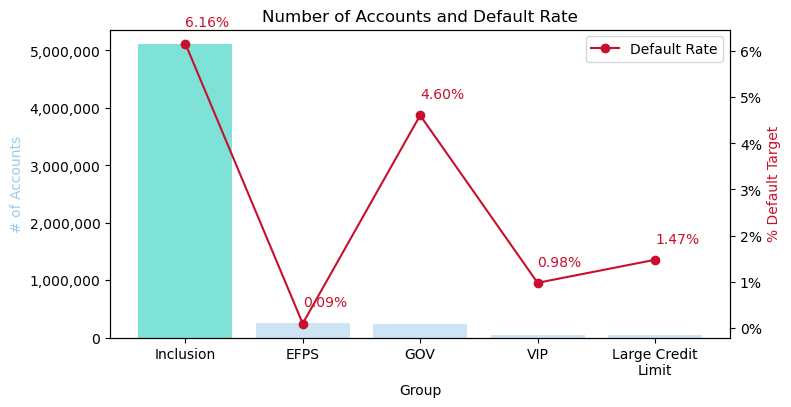

In [15]:
from textwrap import wrap

# Create a combination chart
fig, ax1 = plt.subplots(figsize=(8, 4))

ax2 = ax1.twinx()
ax1.bar(grouped.index, grouped['Number of Accounts'], color=['#9bcbeb' if i >= 1 else '#00c7b1' for i in grouped.index], alpha=0.5, label='Total')
ax2.plot(grouped.index, grouped['Default Rate'] * 100, color='#c8102e', marker='o', label='Default Rate')

ax1.set_xlabel('Group')
ax1.set_ylabel('# of Accounts', color='#9bcbeb')
# y label format as number with comma
ax1.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

ax2.set_ylabel('% Default Target', color='#c8102e')
# y label format as percent with 0 decimal place
ax2.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.0f}%".format(x)))

# data label on ax2 as percent with 1 decimal place
for i, v in enumerate(grouped['Default Rate']):
    ax2.text(i, v * 100 + 0.3, "{:.2f}%".format(v * 100), color='#c8102e', ha='left', va='bottom')


plt.xticks(grouped.index, grouped['Group'])
# rotate xticks
# plt.setp(ax1.xaxis.get_majorticklabels(), rotation=65)

labels = [ '\n'.join(wrap(l, 15)) for l in grouped['Group']]
ax1.set_xticklabels(labels)

plt.title('Number of Accounts and Default Rate')
plt.legend(loc='upper right')
plt.show()

### Organize the datasets into a dictionary
This approach facilitates efficient access and manipulation.

In [16]:
df_flags = df_combine['EXCL_FLAG_GROUP'].unique()

# convert string to lowercase and replace space and / with underscore
converter = lambda x: x.lower().replace(" ", "_").replace("/", "_")
df_names = list(map(converter, df_flags))
print(df_names)

['inclusion', 'gov', 'vip', 'efps', 'large_credit_limit']


In [17]:
all_acct = df_combine.copy()

# Split data into inclusion/exclusion flags
df_list = {}

for e,l in zip(df_flags, df_names):
    d = all_acct.loc[all_acct['EXCL_FLAG_GROUP'] == e]
    d = d.drop(['EXCL_FLAG_GROUP'], axis=1)
    df_list[l] = d
    # Print each dataframe shape
    print(l, 'shape: ', df_list[l].shape)

inclusion shape:  (5108662, 31)
gov shape:  (230315, 31)
vip shape:  (46859, 31)
efps shape:  (254926, 31)
large_credit_limit shape:  (45320, 31)


### Calculate ROC-AUC, Presicion, Recall, and F1 Score

In [18]:
from sklearn.metrics import auc, roc_curve, precision_recall_curve

fpr = {}
tpr = {}
fpr_tpr_threshold = {}
roc_auc = {}
precision = {}
recall = {}
f1 = {}
precision_recall_threshold = {}
pr_auc = {}

for i,j in zip(df_list, df_flags):
    # Calculate ROC curve and AUC
    fpr[j], tpr[j], fpr_tpr_threshold[j] = roc_curve(df_list[i]['target'], df_list[i]['y_pred_proba'])
    roc_auc[j] = auc(fpr[j], tpr[j])

    # Calculate precision-recall curve and AUC
    precision[j], recall[j], precision_recall_threshold[j] = precision_recall_curve(df_list[i]['target'], df_list[i]['y_pred_proba'])
    pr_auc[j] = auc(recall[j], precision[j])
    f1[j] = 2*precision[j]*recall[j]/(precision[j]+recall[j])

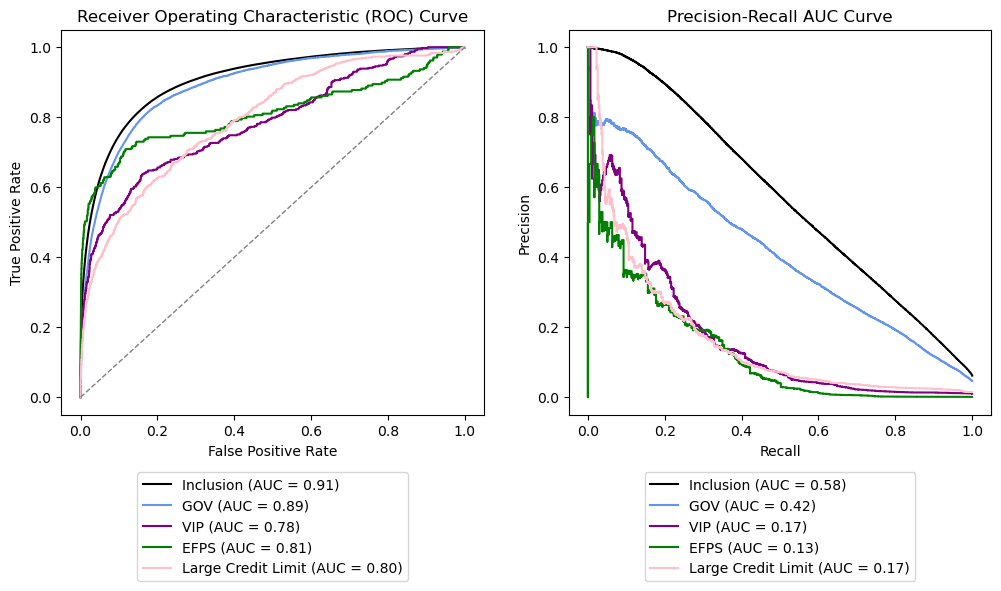

In [19]:
# Plot ROC-AUC and PR-AUC side by side
plt.figure(figsize=(12, 5))

colors = ['black', 'cornflowerblue', 'purple', 'green', 'pink']
lines = []
lines2 = []
to_plot = df_flags

plt.subplot(1, 2, 1)
for p,c in zip(to_plot, colors):
    lines += plt.plot(fpr[p], tpr[p], color=c, lw=1.5, label=f'{p} (AUC = {roc_auc[p]:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')
labels = [l.get_label() for l in lines]
# plot legend outside of plot
plt.legend(lines, labels, loc='lower center', bbox_to_anchor=(0.5, -0.45))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

plt.subplot(1, 2, 2)
for p,c in zip(to_plot, colors):
    lines2 += plt.step(recall[p], precision[p], color=c, where='post', label=f'{p} (AUC = {pr_auc[p]:.2f})')
labels2 = [l.get_label() for l in lines2]
# move legend to lower center outside of plot
plt.legend(lines2, labels2, loc='lower center', bbox_to_anchor=(0.5, -0.45))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall AUC Curve')

# plt.tight_layout()
plt.show()

In [99]:
def calculate_decile_table(binded_df, bins):
    result = []

    binded_df = binded_df.sort_values("y_pred_proba", ascending = False)
    binded_df["DECILE"] = pd.qcut(binded_df["y_pred_proba"], q = bins, labels = list(range(bins, 0, -1)))
    binded_df["TOTAL_EVENT_RATE"] =  binded_df["target"].mean()

    # Calculate the number of accounts and default accounts for each decile
    decile_df = binded_df.groupby("DECILE").agg(
        count=("y_pred_proba", "cont"),
        default=("target", "sum"),
        TOTAL_EVENT_RATE=("TOTAL_EVENT_RATE", "mean")
    ).reset_index()

    # Calculate the predicted probability range for each decile
    decile_df["PROB_RANGE"] = binded_df.groupby("DECILE")["y_pred_proba"].agg(["min", "max"]).apply(lambda x: f"{x['min']:.4f} - {x['max']:.4f}", axis=1).values
    decile_df["PROB_AVG"] = binded_df.groupby("DECILE")["y_pred_proba"].agg(["mean"]).values
    decile_df["PROB_AVG"] = round(decile_df["PROB_AVG"], 4)

    # sort dataframes by decile
    decile_df = decile_df.sort_values(by='DECILE', ascending=False)

    # Calculate the cumulative number of accounts and default accounts
    # decile_df["cum_count"] = round(decile_df["count"].cumsum(),0)
    # decile_df["cum_default"] = decile_df["default"].cumsum()

    # # Calculate the cumulative percentage of accounts and default accounts
    # decile_df["cum_pct_count"] = decile_df["cum_count"] / decile_df["count"].sum() * 100
    # decile_df["cum_pct_default"] = round((decile_df["cum_default"] / decile_df["default"].sum()), 3)

    # # Calculate the default rate for each decile
    # decile_df["default_rate"] = round((decile_df["default"] / decile_df["count"]), 3)

    # # Calculate gain for each decile
    # decile_df["gain"] = round((decile_df["cum_default"] / binded_df["target"].sum()), 3)

    # # Calculate the lift for each decile
    # decile_df["lift"] = round((decile_df["gain"]*100) / (decile_df["cum_pct_count"]), 3)

    # #         decile_index = decile_df.index.tolist()
    # decile_index = decile_df["PROB_RANGE"].values.flatten().tolist()
    # decile_cnt = decile_df["count"].values.flatten().tolist()
    # default_rate = decile_df["default_rate"].values.flatten().tolist()
    # avg_prob = decile_df["PROB_AVG"].values.flatten().tolist()
    # TOTAL_EVENT_RATE = decile_df["TOTAL_EVENT_RATE"].values.flatten().tolist()

    # cols_to_display = [
    #     "DECILE", "PROB_RANGE", "PROB_AVG", "default_rate", "cum_count", "cum_default", "cum_pct_default",
    #     "gain", "lift"
    # ]

    # decile_df = decile_df[cols_to_display]
    return decile_df

In [136]:
def calculate_decile_table(binded, bins):
    result = []

    binded = binded.sort_values("y_pred_proba", ascending = False)
    binded["DECILE"] = pd.qcut(binded["y_pred_proba"].rank(method='first'), q = bins, labels = list(range(bins, 0, -1)))
    binded["TOTAL_EVENT_RATE"] =  binded["target"].mean()

    # Calculate the number of accounts and default accounts for each decile
    decile_df = binded.groupby("DECILE").agg(
        COUNT=("y_pred_proba", "count"),
        DEFAULT=("target", "sum"),
        TOTAL_EVENT_RATE=("TOTAL_EVENT_RATE", "mean"),
    ).reset_index()

    # Calculate the predicted probability range for each decile
    decile_df["PROB_RANGE"] = binded.groupby("DECILE")["y_pred_proba"].agg(["min", "max"]).apply(lambda x: f"({x['min']:.4f} - {x['max']:.4f}]", axis=1).values
    decile_df["AVG_PROB"] = binded.groupby("DECILE")["y_pred_proba"].agg(["mean"]).values
    decile_df["AVG_PROB"] = round(decile_df["AVG_PROB"], 4)

    # sort dataframes by decile
    decile_df = decile_df.sort_values(by="DECILE", ascending=False)

    # Calculate the cumulative number of accounts and default accounts
    decile_df["CUM_COUNT"] = round(decile_df["COUNT"].cumsum(),0)
    decile_df["CUM_DEFAULT"] = decile_df["DEFAULT"].cumsum()

    # Calculate the cumulative percentage of accounts and default accounts
    decile_df["CUM_PCT_COUNT"] = round(decile_df["CUM_COUNT"] / decile_df["COUNT"].sum() * 100, 3)
    decile_df["CUM_PCT_DEFAULT"] = round((decile_df["CUM_DEFAULT"] / decile_df["DEFAULT"].sum()), 3)

    # Calculate the default rate for each decile
    decile_df["DEFAULT_RATE"] = round((decile_df["DEFAULT"] / decile_df["COUNT"]), 3)

    # Calculate gain for each decile
    decile_df["GAIN"] = round((decile_df["CUM_DEFAULT"] / binded["target"].sum()), 3)

    # Calculate the lift for each decile
    decile_df["LIFT"] = round((decile_df["GAIN"]*100) / (decile_df["CUM_PCT_COUNT"]), 3)

    cols_to_display = [
        "DECILE", "PROB_RANGE", "AVG_PROB", "COUNT", "DEFAULT_RATE", "TOTAL_EVENT_RATE", "CUM_COUNT", "CUM_DEFAULT", "CUM_PCT_DEFAULT",
        "GAIN", "LIFT"
    ]

    decile_df = decile_df[cols_to_display]

    return decile_df


def lift_curve(name, df_binned):
    event_rate = df_binned["TOTAL_EVENT_RATE"].astype(float).mean()

    # Build event rate plot
    fig = plt.figure(figsize=(12,4))

    # Plot barplot containing number of observations
    plt.bar(df_binned.index, df_binned["COUNT"], color="lightgray")

    # Add ticks & laels to axis
    plt.xlabel("Model Sorted Predictions (Low → High)")
    plt.ylabel("# Observations")
    plt.xticks(df_binned.index, df_binned["PROB_RANGE"], rotation=45, ha='right', rotation_mode='anchor')
    plt.title(f"Actual vs. Predicted Lift Chart ({name})")

    # Mirror plot and add event rates
    plt2 = plt.twinx()
    plt2.set_ylabel("Event rate")
    plt2.set_ylim(ymin=0, ymax=df_binned["DEFAULT_RATE"].max() + 0.1)
    plt2.set_yticks(np.arange(0, df_binned["DEFAULT_RATE"].max() + 0.1, step=0.05))
    plt2.plot(
        df_binned.index, df_binned["DEFAULT_RATE"], label="event_rate", marker="o"
    )

    # add average prediction
    plt2.plot(
        df_binned.index,
        df_binned["AVG_PROB"],
        label="average_prediction",
        marker="x",
        linestyle=":",
        color="black"
    )

    # Add global event rate as baseline
    plt2.plot(
        [min(df_binned.index) - 1, max(df_binned.index) + 1],
        [event_rate, event_rate],
        color="darkgrey",
        lw=1,
        linestyle="--",
        label=f"total_event_rate\n({'{:.1%}'.format(event_rate)})",
    )
    plt2.legend(loc=0)
    plt2.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0))

    plt2.yaxis.grid(False)
    plt2.set_xlim([min(df_binned.index) - 0.5, max(df_binned.index) + 0.5])

    plt.show()

In [175]:
at_150k = df_list['large_credit_limit'].loc[df_list['large_credit_limit']['CR_LIMIT'] == 150000]
morethan_150k = df_list['large_credit_limit'].loc[df_list['large_credit_limit']['CR_LIMIT'] > 150000]

In [186]:
# change ref_date to date
morethan_150k['REF_DATE'] = pd.to_datetime(morethan_150k['REF_DATE'], format='%Y-%m-%d %H:%M:%S')

# create datafram call morethan_150k_2021 which have ref_date in 2021
morethan_150k_2021 = morethan_150k[morethan_150k['REF_DATE'].dt.year == 2021]
print(morethan_150k_2021.shape)

# create datafram call morethan_150k_2022_1h which have ref_date in 1st half of the year 2022
morethan_150k_2022_1h = morethan_150k[(morethan_150k['REF_DATE'].dt.year == 2022) & (morethan_150k['REF_DATE'].dt.month <= 6)]
morethan_150k_2022_2h = morethan_150k[(morethan_150k['REF_DATE'].dt.year == 2022) & (morethan_150k['REF_DATE'].dt.month > 6)]
print(morethan_150k_2022_1h.shape, morethan_150k_2022_2h.shape)

(7981, 31)
(11231, 31) (11593, 31)


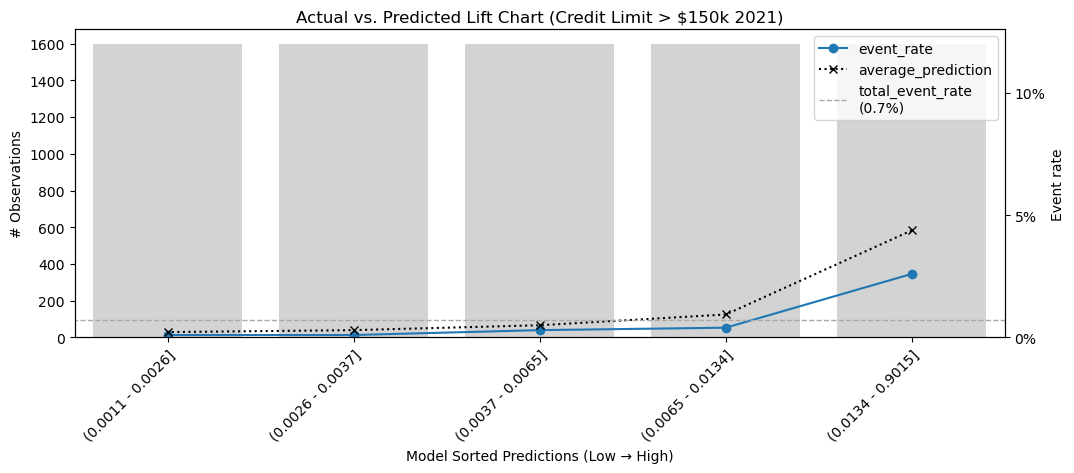

In [187]:
lift_curve('Credit Limit > $150k 2021', calculate_decile_table(morethan_150k_2021, 5))

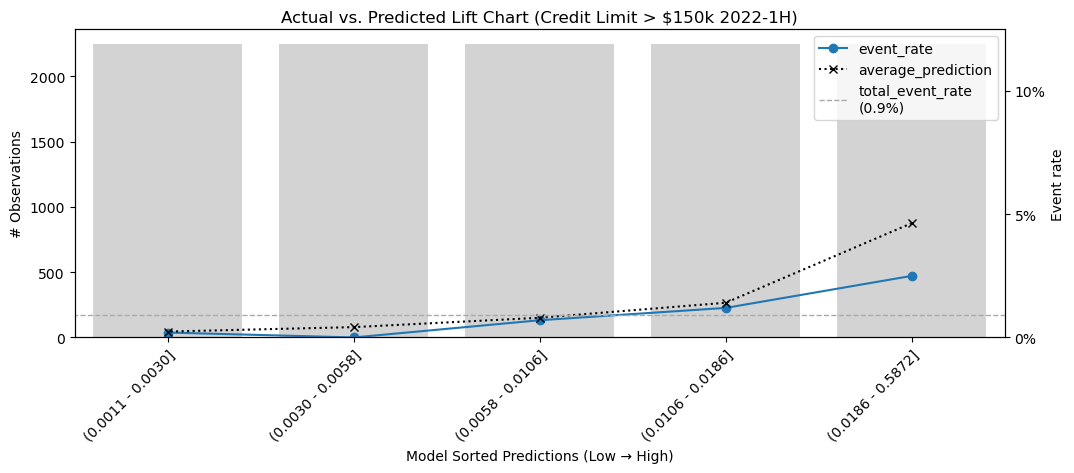

In [188]:
lift_curve('Credit Limit > $150k 2022-1H', calculate_decile_table(morethan_150k_2022_1h, 5))

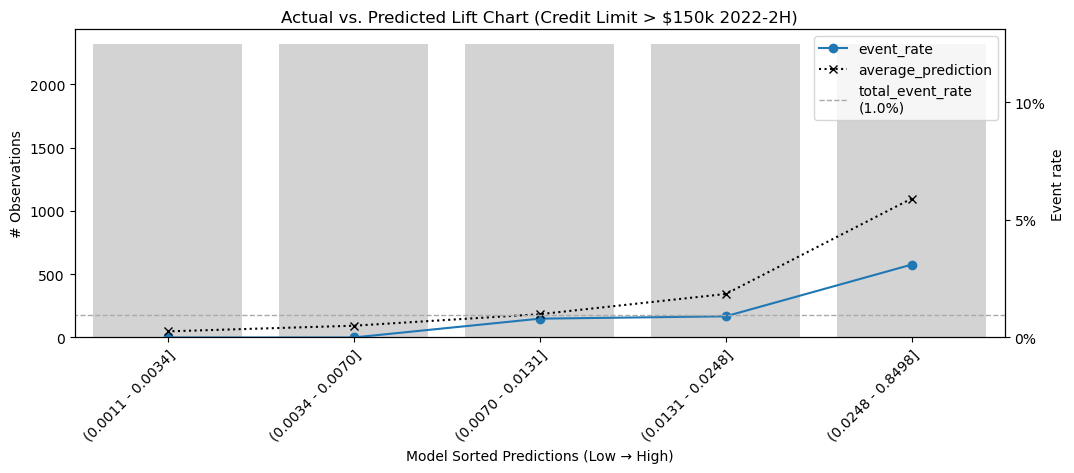

In [189]:
lift_curve('Credit Limit > $150k 2022-2H', calculate_decile_table(morethan_150k_2022_2h, 5))

In [27]:
# calculate_decile_table(df_list['gov_vip_and_efps'])

In [64]:
calculate_decile_table(df_list['efps'])

,decile,prob_range,avg_prob,default_rate,cum_count,cum_default,cum_pct_default,gain,lift
19,1,0.0313 - 0.9631,0.0816,0.011,12747,143,0.603,0.603,12.059
18,2,0.0195 - 0.0313,0.0242,0.001,25493,158,0.667,0.667,6.670
17,3,0.0148 - 0.0195,0.0169,0.001,38239,173,0.730,0.730,4.867
16,4,0.0122 - 0.0148,0.0134,0.000,50985,176,0.743,0.743,3.715
15,5,0.0104 - 0.0122,0.0113,0.000,63732,177,0.747,0.747,2.988
14,6,0.0092 - 0.0104,0.0098,0.000,76478,179,0.755,0.755,2.517
13,7,0.0081 - 0.0092,0.0086,0.000,89223,180,0.759,0.759,2.169
12,8,0.0073 - 0.0081,0.0077,0.001,101970,187,0.789,0.789,1.973
11,9,0.0066 - 0.0073,0.0069,0.000,114717,190,0.802,0.802,1.782
10,10,0.0059 - 0.0066,0.0062,0.000,127463,194,0.819,0.819,1.638


In [71]:
calculate_decile_table(df_list['large_credit_limit'])

,decile,prob_range,avg_prob,default_rate,cum_count,cum_default,cum_pct_default,gain,lift
19,1,0.0551 - 0.9696,0.1346,0.114,2266,258,0.386,0.386,7.720
18,2,0.0336 - 0.0551,0.0421,0.032,4532,330,0.494,0.494,4.940
17,3,0.0252 - 0.0336,0.0289,0.021,6798,377,0.564,0.564,3.760
16,4,0.0203 - 0.0252,0.0225,0.017,9064,415,0.621,0.621,3.105
15,5,0.0165 - 0.0203,0.0182,0.015,11330,448,0.671,0.671,2.684
14,6,0.0139 - 0.0165,0.0151,0.012,13596,475,0.711,0.711,2.370
13,7,0.0119 - 0.0139,0.0129,0.011,15862,499,0.747,0.747,2.134
12,8,0.0103 - 0.0119,0.0111,0.011,18128,525,0.786,0.786,1.965
11,9,0.0089 - 0.0103,0.0096,0.010,20394,548,0.820,0.820,1.822
10,10,0.0078 - 0.0089,0.0083,0.012,22660,575,0.861,0.861,1.722


In [30]:
def calculate_decile_table_cl_bucket(binded):
    result = []

    binded = binded.sort_values("CR_LIMIT", ascending = False)
    binded["CR_LIMIT_BUCKET"] = pd.qcut(binded["CR_LIMIT"].rank(method='first'), q = 10, labels = list(range(10, 0, -1)))
    binded["TOTAL_EVENT_RATE"] =  binded["target"].mean()

    # Calculate the number of accounts and default accounts for each decile
    decile_df = binded.groupby("CR_LIMIT_BUCKET").agg(
        COUNT=("CR_LIMIT", "count"),
        DEFAULT=("target", "sum"),
        TOTAL_EVENT_RATE=("TOTAL_EVENT_RATE", "mean"),
    ).reset_index()

    # Calculate the predicted probability range for each decile
    decile_df["CR_LIMIT_RANGE"] = binded.groupby("CR_LIMIT_BUCKET")["CR_LIMIT"].agg(["min", "max"]).apply(lambda x: f"{x['min']:,.0f} - {x['max']:,.0f}", axis=1).values
    decile_df["AVG_CL_LIMIT"] = binded.groupby("CR_LIMIT_BUCKET")["CR_LIMIT"].agg(["mean"]).values
    decile_df["AVG_CL_LIMIT"] = round(decile_df["AVG_CL_LIMIT"], 2)

    # Calculate the predicted probability range for each decile
    decile_df["PROB_RANGE"] = binded.groupby("CR_LIMIT_BUCKET")["y_pred_proba"].agg(["min", "max"]).apply(lambda x: f"{x['min']:.3f} - {x['max']:.3f}", axis=1).values
    decile_df["AVG_PROB"] = binded.groupby("CR_LIMIT_BUCKET")["y_pred_proba"].agg(["mean"]).values
    decile_df["AVG_PROB"] = round(decile_df["AVG_PROB"], 4)

    # sort dataframes by decile
    decile_df = decile_df.sort_values(by="CR_LIMIT_BUCKET", ascending=False)

    # Calculate the cumulative number of accounts and default accounts
    decile_df["CUM_COUNT"] = round(decile_df["COUNT"].cumsum(),0)
    decile_df["CUM_DEFAULT"] = decile_df["DEFAULT"].cumsum()

    # Calculate the cumulative percentage of accounts and default accounts
    decile_df["CUM_PCT_COUNT"] = round(decile_df["CUM_COUNT"] / decile_df["COUNT"].sum() * 100, 3)
    decile_df["CUM_PCT_DEFAULT"] = round((decile_df["CUM_DEFAULT"] / decile_df["DEFAULT"].sum()), 3)

    # Calculate the default rate for each decile
    decile_df["DEFAULT_RATE"] = round((decile_df["DEFAULT"] / decile_df["COUNT"]), 3)

    # Calculate gain for each decile
    decile_df["GAIN"] = round((decile_df["CUM_DEFAULT"] / binded["target"].sum()), 3)

    # Calculate the lift for each decile
    decile_df["LIFT"] = round((decile_df["GAIN"]*100) / (decile_df["CUM_PCT_COUNT"]), 3)

    cols_to_display = [
        "CR_LIMIT_BUCKET", "CR_LIMIT_RANGE", "AVG_CL_LIMIT", "PROB_RANGE", "AVG_PROB", "COUNT", "DEFAULT_RATE", "TOTAL_EVENT_RATE", "CUM_COUNT", "CUM_DEFAULT", "CUM_PCT_DEFAULT",
        "GAIN", "LIFT", "CUM_PCT_COUNT"
    ]

    decile_df = decile_df[cols_to_display]

    return decile_df

In [37]:
calculate_decile_table_cl_bucket(df_list['inclusion'])

,CR_LIMIT_BUCKET,CR_LIMIT_RANGE,AVG_CL_LIMIT,PROB_RANGE,AVG_PROB,COUNT,DEFAULT_RATE,TOTAL_EVENT_RATE,CUM_COUNT,CUM_DEFAULT,CUM_PCT_DEFAULT,GAIN,LIFT,CUM_PCT_COUNT
9,1,"22,800 - 149,999",47651.27,0.001 - 0.990,0.0262,510867,0.033,0.061608,510867,16732,0.053,0.053,0.530,10.0
8,2,"12,500 - 22,800",16753.60,0.001 - 0.990,0.0348,510866,0.041,0.061608,1021733,37521,0.119,0.119,0.595,20.0
7,3,"8,200 - 12,500",10181.87,0.001 - 0.990,0.0491,510866,0.059,0.061608,1532599,67819,0.215,0.215,0.717,30.0
6,4,"5,800 - 8,200",6940.76,0.001 - 0.991,0.0502,510866,0.059,0.061608,2043465,98078,0.312,0.312,0.780,40.0
5,5,"4,000 - 5,800",4861.44,0.001 - 0.989,0.0486,510866,0.057,0.061608,2554331,127357,0.405,0.405,0.810,50.0
4,6,"3,000 - 4,000",3481.17,0.001 - 0.989,0.0542,510866,0.063,0.061608,3065197,159331,0.506,0.506,0.843,60.0
3,7,"2,000 - 3,000",2447.00,0.001 - 0.987,0.0520,510866,0.060,0.061608,3576063,189734,0.603,0.603,0.861,70.0
2,8,"1,400 - 2,000",1712.87,0.001 - 0.987,0.0603,510866,0.067,0.061608,4086929,224029,0.712,0.712,0.890,80.0
1,9,"800 - 1,400",1081.09,0.001 - 0.986,0.0704,510866,0.082,0.061608,4597795,265780,0.844,0.844,0.938,90.0
0,10,100 - 800,573.12,0.001 - 0.985,0.0832,510867,0.096,0.061608,5108662,314732,1.000,1.000,1.000,100.0


In [38]:
calculate_decile_table_cl_bucket(df_list['government'])

,CR_LIMIT_BUCKET,CR_LIMIT_RANGE,AVG_CL_LIMIT,PROB_RANGE,AVG_PROB,COUNT,DEFAULT_RATE,TOTAL_EVENT_RATE,CUM_COUNT,CUM_DEFAULT,CUM_PCT_DEFAULT,GAIN,LIFT,CUM_PCT_COUNT
9,1,"38,000 - 10,000,000",177484.82,0.001 - 0.947,0.0287,23032,0.047,0.04605,23032,1084,0.102,0.102,1.020,10.0
8,2,"18,200 - 38,000",25714.48,0.001 - 0.866,0.0266,23031,0.044,0.04605,46063,2091,0.197,0.197,0.985,20.0
7,3,"10,500 - 18,200",14076.75,0.001 - 0.930,0.0263,23032,0.039,0.04605,69095,2983,0.281,0.281,0.937,30.0
6,4,"7,000 - 10,500",8745.88,0.001 - 0.916,0.0277,23031,0.040,0.04605,92126,3909,0.369,0.369,0.922,40.0
5,5,"4,500 - 7,000",5618.85,0.001 - 0.873,0.0290,23031,0.042,0.04605,115157,4885,0.461,0.461,0.922,50.0
4,6,"3,000 - 4,500",3746.77,0.001 - 0.974,0.0289,23032,0.044,0.04605,138189,5898,0.556,0.556,0.927,60.0
3,7,"2,000 - 3,000",2534.74,0.001 - 0.918,0.0322,23031,0.044,0.04605,161220,6907,0.651,0.651,0.930,70.0
2,8,"1,300 - 2,000",1728.02,0.001 - 0.903,0.0359,23032,0.049,0.04605,184252,8039,0.758,0.758,0.948,80.0
1,9,"900 - 1,300",1054.23,0.001 - 0.974,0.0414,23031,0.058,0.04605,207283,9368,0.883,0.883,0.981,90.0
0,10,100 - 900,574.93,0.002 - 0.930,0.0408,23032,0.054,0.04605,230315,10606,1.000,1.000,1.000,100.0


In [39]:
calculate_decile_table_cl_bucket(df_list['vip_non_government'])

,CR_LIMIT_BUCKET,CR_LIMIT_RANGE,AVG_CL_LIMIT,PROB_RANGE,AVG_PROB,COUNT,DEFAULT_RATE,TOTAL_EVENT_RATE,CUM_COUNT,CUM_DEFAULT,CUM_PCT_DEFAULT,GAIN,LIFT,CUM_PCT_COUNT
9,1,"1,189,458 - 65,000,000",2118976.32,0.002 - 0.218,0.0236,4686,0.000,0.009753,4686,0,0.000,0.000,0.000,10.000
8,2,"28,320 - 1,189,458",135552.56,0.001 - 0.819,0.0260,4686,0.008,0.009753,9372,39,0.085,0.085,0.425,20.000
7,3,"13,700 - 28,320",19418.93,0.001 - 0.536,0.0267,4686,0.008,0.009753,14058,75,0.164,0.164,0.547,30.001
6,4,"8,700 - 13,700",10740.05,0.001 - 0.939,0.0298,4686,0.003,0.009753,18744,88,0.193,0.193,0.482,40.001
5,5,"6,000 - 8,700",7125.17,0.001 - 0.815,0.0327,4685,0.002,0.009753,23429,98,0.214,0.214,0.428,49.999
4,6,"4,200 - 6,000",5083.69,0.001 - 0.697,0.0271,4686,0.006,0.009753,28115,126,0.276,0.276,0.460,59.999
3,7,"3,000 - 4,200",3487.95,0.001 - 0.913,0.0344,4686,0.012,0.009753,32801,184,0.403,0.403,0.576,69.999
2,8,"1,900 - 3,000",2311.74,0.002 - 0.870,0.0305,4686,0.019,0.009753,37487,272,0.595,0.595,0.744,80.000
1,9,"1,000 - 1,900",1393.93,0.002 - 0.882,0.0330,4686,0.014,0.009753,42173,337,0.737,0.737,0.819,90.000
0,10,"100 - 1,000",682.39,0.002 - 0.846,0.0417,4686,0.026,0.009753,46859,457,1.000,1.000,1.000,100.000


In [40]:
# calculate_decile_table_cl_bucket(df_list['gov_vip_and_efps'])

In [41]:
calculate_decile_table_cl_bucket(df_list['efps'])

,CR_LIMIT_BUCKET,CR_LIMIT_RANGE,AVG_CL_LIMIT,PROB_RANGE,AVG_PROB,COUNT,DEFAULT_RATE,TOTAL_EVENT_RATE,CUM_COUNT,CUM_DEFAULT,CUM_PCT_DEFAULT,GAIN,LIFT,CUM_PCT_COUNT
9,1,"45,000 - 10,500,000",143197.83,0.001 - 0.472,0.0091,25493,0.000,0.00093,25493,0,0.000,0.000,0.000,10.0
8,2,"21,500 - 45,000",30389.92,0.001 - 0.734,0.0098,25492,0.000,0.00093,50985,10,0.042,0.042,0.210,20.0
7,3,"13,100 - 21,500",16815.90,0.001 - 0.839,0.0104,25493,0.000,0.00093,76478,20,0.084,0.084,0.280,30.0
6,4,"8,900 - 13,100",10701.85,0.001 - 0.922,0.0107,25492,0.000,0.00093,101970,23,0.097,0.097,0.243,40.0
5,5,"6,000 - 8,900",7400.25,0.001 - 0.862,0.0093,25493,0.001,0.00093,127463,40,0.169,0.169,0.338,50.0
4,6,"4,348 - 6,000",5192.17,0.001 - 0.896,0.0108,25492,0.002,0.00093,152955,80,0.338,0.338,0.563,60.0
3,7,"3,000 - 4,348",3647.87,0.001 - 0.847,0.0098,25493,0.001,0.00093,178448,98,0.414,0.414,0.591,70.0
2,8,"2,000 - 3,000",2531.81,0.001 - 0.948,0.0115,25492,0.000,0.00093,203940,110,0.464,0.464,0.580,80.0
1,9,"1,200 - 2,000",1617.78,0.002 - 0.924,0.0129,25493,0.001,0.00093,229433,140,0.591,0.591,0.657,90.0
0,10,"100 - 1,200",793.72,0.001 - 0.963,0.0177,25493,0.004,0.00093,254926,237,1.000,1.000,1.000,100.0


In [42]:
calculate_decile_table_cl_bucket(df_list['large_credit_limit'])

,CR_LIMIT_BUCKET,CR_LIMIT_RANGE,AVG_CL_LIMIT,PROB_RANGE,AVG_PROB,COUNT,DEFAULT_RATE,TOTAL_EVENT_RATE,CUM_COUNT,CUM_DEFAULT,CUM_PCT_DEFAULT,GAIN,LIFT,CUM_PCT_COUNT
9,1,"1,321,042 - 30,000,000",2207826.33,0.002 - 0.483,0.0166,4532,0.007,0.01474,4532,30,0.045,0.045,0.450,10.0
8,2,"687,500 - 1,321,042",989353.88,0.002 - 0.850,0.0168,4532,0.006,0.01474,9064,58,0.087,0.087,0.435,20.0
7,3,"340,050 - 687,500",488900.71,0.001 - 0.727,0.0172,4532,0.010,0.01474,13596,102,0.153,0.153,0.510,30.0
6,4,"259,160 - 340,050",290591.54,0.001 - 0.746,0.0098,4532,0.006,0.01474,18128,129,0.193,0.193,0.483,40.0
5,5,"213,500 - 259,160",243366.34,0.001 - 0.846,0.0131,4532,0.010,0.01474,22660,173,0.259,0.259,0.518,50.0
4,6,"194,400 - 213,500",199272.54,0.001 - 0.901,0.0172,4532,0.011,0.01474,27192,225,0.337,0.337,0.562,60.0
3,7,"150,000 - 194,400",168822.23,0.001 - 0.870,0.0219,4532,0.016,0.01474,31724,297,0.445,0.445,0.636,70.0
2,8,"150,000 - 150,000",150000.00,0.001 - 0.911,0.0199,4532,0.030,0.01474,36256,433,0.648,0.648,0.810,80.0
1,9,"150,000 - 150,000",150000.00,0.001 - 0.946,0.0199,4532,0.029,0.01474,40788,564,0.844,0.844,0.938,90.0
0,10,"150,000 - 150,000",150000.00,0.001 - 0.970,0.0198,4532,0.023,0.01474,45320,668,1.000,1.000,1.000,100.0


In [69]:
import seaborn as sns
from typing import Any, Dict, List, Tuple, Union
from sklearn import metrics
from tqdm import tqdm
from sklearn.metrics import auc, roc_curve
from matplotlib import ticker

def create_binary_target_plots(
    df: pd.DataFrame,
    target_col: str,
    feature_col: str,
    n_bins: int = 10,
    min_feature_val: float = None,
    max_feature_val: float = None,
    min_feature_q: float = None,
    max_feature_q: float = None,
    create_plot=True,
    invert_xaxis=False,
    use_quantiles: bool = True,
    fillna: bool = False,
    add_feature_means: bool = False,
    add_lift_rates: bool = False,
) -> Tuple[Union[pd.DataFrame, None], Union[plt.figure, None]]:
    """Creates three plots for univariate analysis for binary targets.
    :param df: Input data frame
    :param target_col: Column name of target variable
    :param feature_col: List of column names contained in df.
    :param n_bins: Number of bins
    :param min_feature_val: Lower feature value at which to
        winsorize (only applied to numerical columns).
    :param max_feature_val Upper feature value at which to
        winsorize (only applied to numerical columns).
    :param min_feature_q: Lower quantile at which to
        winsorize (only applied to numerical columns).
    :param max_feature_q: Upper quantile at which to
        winsorize (only applied to numerical columns).
    :param create_plot: Determines whether figure will be plotted.
    :param use_quantiles: Whether to use quantiles for event rate bins.
    :return: -> Dataframe containing feature and target metrics and figure:
    """

    # Ensure columns exist
    if (feature_col not in df.columns) or (target_col not in df.columns):
        raise ValueError(f"{feature_col} or {target_col} not in df!")

    if df[feature_col].nunique() < 2:
        _logger.info("Feature contains less than 2 features!")
        return None, None

    # Ensure target contains no NA values
    if df[target_col].isna().sum() > 0:
        raise ValueError("Target column contains NA values!")

    # Ensure target is binary
    if df[target_col].nunique() != 2:
        raise ValueError("Target variable is not binary!")

    # Ensure min/max values are in correct order
    if (
        min_feature_val is not None
        and max_feature_val is not None
        and min_feature_val >= max_feature_val
    ):
        raise ValueError(
            "min_feature_value must be strictly smaller than max_feature_val!"
        )
    elif (
        min_feature_q is not None
        and max_feature_q is not None
        and min_feature_q >= max_feature_q
    ):
        raise ValueError("min_feature_q must be strictly smaller than max_feature_q!")
    elif min_feature_q is not None and min_feature_q < 0:
        raise ValueError("Quantiles must be values between 0 and 1!!")
    elif max_feature_q is not None and max_feature_q < 0:
        raise ValueError("Quantiles must be values between 0 and 1!!")

    # Create fresh copy of dataframe
    df = df.copy()

    # Calculate global event rate
    event_rate = np.mean(df[target_col])

    # Case 1: At most n_bins elements
    if df[feature_col].nunique() < n_bins:

        # Extract unique values
        unique_vals = df[feature_col].sort_values().unique()

        # Convert sorted elements to int
        mapping = pd.factorize(unique_vals, na_sentinel=len(unique_vals))

        # Create mapping
        mapping_values = list(mapping[0])
        mapping_keys = list(mapping[1])

        # Create mapping dictionary
        mapping_dict = dict(zip(mapping_keys, mapping_values))

        # Apply mapping to column
        df = df.assign(bins=df[feature_col].map(mapping_dict))

        # Set labels for plotting
        labels = mapping_keys

    # Case 2: More than n_bins elements and categorical
    elif (not pd.api.types.is_numeric_dtype(df[feature_col])) and (
        df[feature_col].nunique() >= n_bins
    ):
        _logger.info(
            f"--- Number of unique elements ({df[feature_col].nunique()} "
            f"exceeds n_bins ({n_bins})). "
            f"Increase n_bins to create a plot!"
        )
        return None, None

    # Case 3: More than n_bins elements and numerical
    elif pd.api.types.is_numeric_dtype(df[feature_col]):

        # Extract number of unique values
        n_unique_feat_vals = df[feature_col].nunique()

        # Adjust n_bins is less unique values exist
        n_bins = np.minimum(n_unique_feat_vals, n_bins)

        min_val = np.nanmin(df[feature_col])
        max_val = np.nanmax(df[feature_col])

        if min_feature_q is not None:
            min_val = np.nanquantile(df[feature_col], min_feature_q)

        if max_feature_q is not None:
            max_val = np.nanquantile(df[feature_col], max_feature_q)

        if min_feature_val is not None:
            min_val = np.maximum(min_val, min_feature_val)

        if max_feature_val is not None:
            max_val = np.minimum(max_val, max_feature_val)

        idx_neg_inf = df[feature_col] == -np.inf
        idx_pos_inf = df[feature_col] == np.inf
        min_val_excl_inf = np.nanmin(df[feature_col][~idx_neg_inf])
        max_val_excl_inf = np.nanmax(df[feature_col][~idx_pos_inf])

        min_val_adj = np.maximum(min_val, min_val_excl_inf)
        max_val_adj = np.minimum(max_val, max_val_excl_inf)

        # Create equidistant grid
        if use_quantiles:
            bins = np.unique(
                df[feature_col]
                .clip(min_val_adj, max_val_adj)
                .quantile(np.linspace(0, 1, n_bins))
            )
            n_bins = len(bins)
        else:
            bins = np.linspace(min_val_adj, max_val_adj, n_bins)

        bins[0] = min_val
        bins[n_bins - 1] = max_val

        # Clip values according to min/max values
        df[feature_col].clip(lower=min_val, upper=max_val, inplace=True)

        # Ensure clipping values dooes not remove all but a single value
        if df[feature_col].nunique() < 2:
            _logger.info(
                "Feature contains less than 2 features after clipping outliers!!"
            )
            return None, None

        # Create bins (return None if binning is not successfull)
        try:
            df = df.assign(
                bins=pd.cut(
                    x=df.loc[:, feature_col],
                    bins=bins,
                    include_lowest=True,
                    right=True,
                    labels=False,
                )
            )
        except Exception as e:
            _logger.warning(e)
            return None, None

        # Create plot labels
        bins = list(bins)
        labels = [
            f'({"{:,.4f}".format(bins[i])}, {"{:,.4f}".format(bins[i+1])}]'
            for i in range(n_bins - 1)
        ]

        # Handle NAs
        if df["bins"].isna().sum() > 0:
            df.loc[:, "bins"] = df.loc[:, "bins"].where(
                ~df.loc[:, "bins"].isna(), n_bins - 1
            )
            labels.append("NA")
            n_bins += 1

        # Convert bins to categories
        df.bins = df.bins.astype("category")

        # Set all categories
        df.bins = df.bins.cat.set_categories(list(range(n_bins - 1)))

    # Group into bins and calculate required metrics
    df_binned = df.groupby("bins").agg(**{
        f"{feature_col}_len": (feature_col, len),
        f"{feature_col}_mean": (feature_col, "mean"),
        f"{target_col}_mean": (target_col, "mean"),
#         feature_col: [len], target_col: ["mean"]
    })

    # Set NA counts to zero
    df_binned[f"{feature_col}_len"] = df_binned[f"{feature_col}_len"].fillna(0)

    # Add lift rate
    df_binned.loc[:, "lift_rate"] = np.divide(
        df_binned[f"{target_col}_mean"], event_rate
    )

    # Build plots dependent on feature type
    if not pd.api.types.is_numeric_dtype(df[feature_col]):

        grid = plt.GridSpec(1, 6, wspace=1.2, hspace=0.2)
        fig_grid = plt.figure(figsize=(18, 12))
        fig_grid.suptitle(f"{feature_col}: Event Rates", fontsize=20)

    else:

        grid = plt.GridSpec(2, 6, wspace=1.2, hspace=0.2, height_ratios=[2, 2])
        fig_grid = plt.figure(figsize=(14, 9))
        fig_grid.suptitle(
            f"{feature_col}: Roc Curve | Densities | Event Rates", fontsize=20
        )
        
        if fillna == True:
            df_imputed = df.copy()
            df_imputed.loc[df_imputed[feature_col].isin([-np.inf, np.inf, np.nan]), feature_col] = df_imputed.loc[~df_imputed[feature_col].isin([-np.inf, np.inf, np.nan]), feature_col].median()
            
        else:
            df_imputed = df.loc[~df[feature_col].isin([-np.inf, np.inf, np.nan])]
        fpr, tpr, _ = metrics.roc_curve(
            df_imputed[target_col], -df_imputed[feature_col], pos_label=1
        )
        auc = metrics.auc(fpr, tpr)
        if auc < 0.5:
            fpr, tpr, _ = metrics.roc_curve(
                df_imputed[target_col], df_imputed[feature_col], pos_label=1
            )
            auc = metrics.auc(fpr, tpr)

        # Build Roc-Curve plot
        upper_ax_left = fig_grid.add_subplot(grid[0, 0:3])
        if pd.api.types.is_numeric_dtype(df[feature_col]):
            upper_ax_left.plot(
                fpr, tpr, lw=2, label=f"{feature_col} (area = {auc:.3f})"
            )

        upper_ax_left.plot([0, 1], [0, 1], color="lightgrey", lw=1, linestyle="--")
        upper_ax_left.set_xlim([0.0, 1.0])
        upper_ax_left.set_ylim([0.0, 1.05])
        upper_ax_left.set_xlabel("Cumulated goods")
        upper_ax_left.set_ylabel("Cumulated bads")
        upper_ax_left.legend(loc="lower right")

        # Build density plot
        upper_ax_right = fig_grid.add_subplot(grid[0, 3:6])

        sns.kdeplot(
            data=df,
            x=feature_col,
            hue=target_col,
            log_scale=False,
            fill=True,
            cumulative=False,
            common_norm=False,
            ax=upper_ax_right,
            clip=(df[feature_col].quantile(0.01), df[feature_col].quantile(0.99))
        )
        if all(df[feature_col] > 0):
            upper_ax_right.set_xscale("log")

    # Build event rate plot
    if pd.api.types.is_numeric_dtype(df[feature_col]):
        lower_ax = fig_grid.add_subplot(grid[1, :])
    else:
        lower_ax = fig_grid.add_subplot(grid[0, :])

    # Add ticks & laels to axis
    lower_ax.set_xlabel(feature_col)
    lower_ax.set_ylabel("# Observations")
    lower_ax.set_xticks(df_binned.index)
    
    # modify labels with lift rates
    if add_lift_rates:
        labels = [
            label + f"\nLift: {lift:.0f}%"
            for label, lift in zip(labels, 100 * df_binned.lift_rate)
        ] 
        
    lower_ax.set_xticklabels(labels, rotation=45, ha='right', rotation_mode='anchor')

    # Plot barplot containing number of observations
    lower_ax.bar(df_binned.index, df_binned[f"{feature_col}_len"], color="lightgray")

    lower_ax.yaxis.grid(False)

    # Mirror plot and add event rates
    lower_ax_2 = lower_ax.twinx()
    lower_ax_2.set_ylabel("Event rate")
    lower_ax_2.set_ylim(ymin=0, ymax=df_binned[f"{target_col}_mean"].max() + 0.15)
    plt.yticks(np.arange(0, df_binned[f"{target_col}_mean"].max() + 0.15, step=0.05))
    lower_ax_2.plot(
        df_binned.index, df_binned[f"{target_col}_mean"], label="event_rate", marker="o"
    )

    # add average prediction
    if add_feature_means:
        lower_ax_2.plot(
            df_binned.index,
            df_binned[f"{feature_col}_mean"],
            label="average_prediction",
            marker="x",
            linestyle=":",
            color="black"
        )
    
    # Add global event rate as baseline
    lower_ax_2.plot(
        [min(df_binned.index) - 1, max(df_binned.index) + 1],
        [event_rate, event_rate],
        color="darkgrey",
        lw=1,
        linestyle="--",
        label=f"total_event_rate\n({'{:.1%}'.format(event_rate)})",
    )
    lower_ax_2.legend(loc=0)
    lower_ax_2.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0))

    lower_ax_2.yaxis.grid(False)
    lower_ax_2.set_xlim([min(df_binned.index) - 0.5, max(df_binned.index) + 0.5])

    if invert_xaxis:
        lower_ax_2.invert_xaxis()

    if create_plot:
        plt.show()

    return df_binned, fig_grid

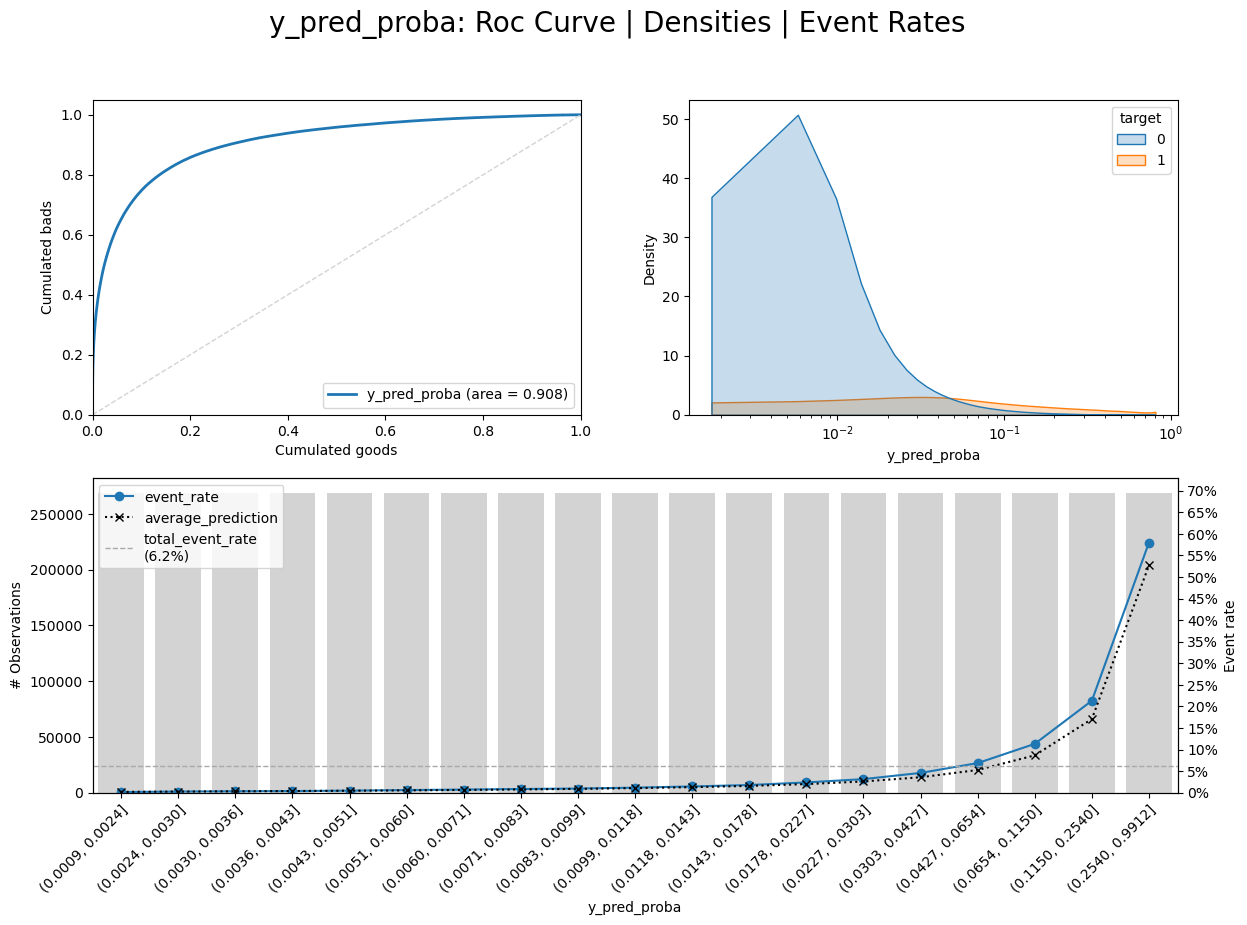

In [44]:
metrics, fig = create_binary_target_plots(
    df=df_list['inclusion'],
    target_col="target",
    feature_col="y_pred_proba",
    n_bins=20,
    min_feature_val=None,
    max_feature_val=None,
    min_feature_q=None,
    max_feature_q=None,
    create_plot=True,
    invert_xaxis=False,
    use_quantiles=True,
    fillna=False,
    add_feature_means=True
)

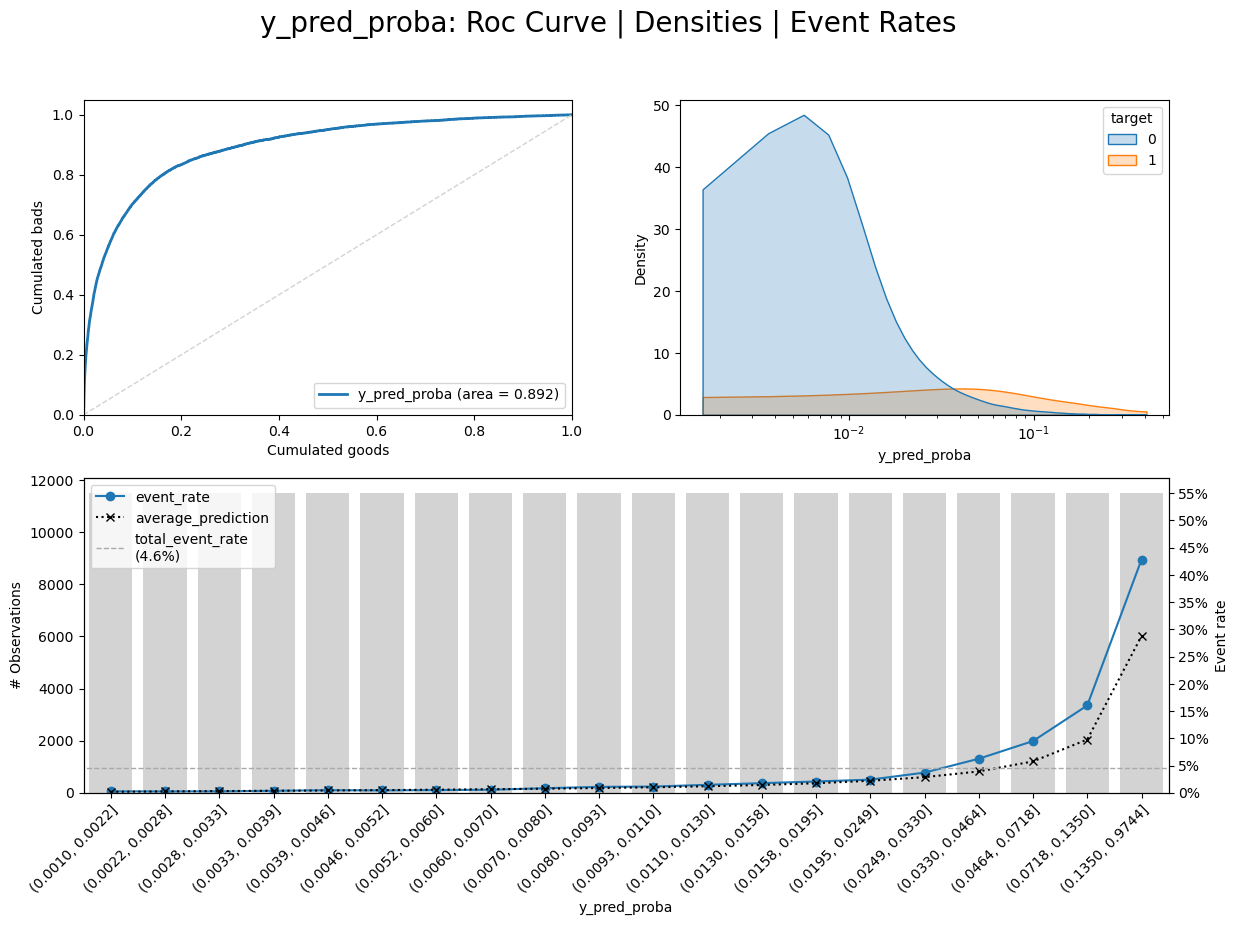

In [51]:
metrics, fig = create_binary_target_plots(
    df=df_list['government'],
    target_col="target",
    feature_col="y_pred_proba",
    n_bins=21,
    min_feature_val=None,
    max_feature_val=None,
    min_feature_q=None,
    max_feature_q=None,
    create_plot=True,
    invert_xaxis=False,
    use_quantiles=True,
    fillna=False,
    add_feature_means=True
)

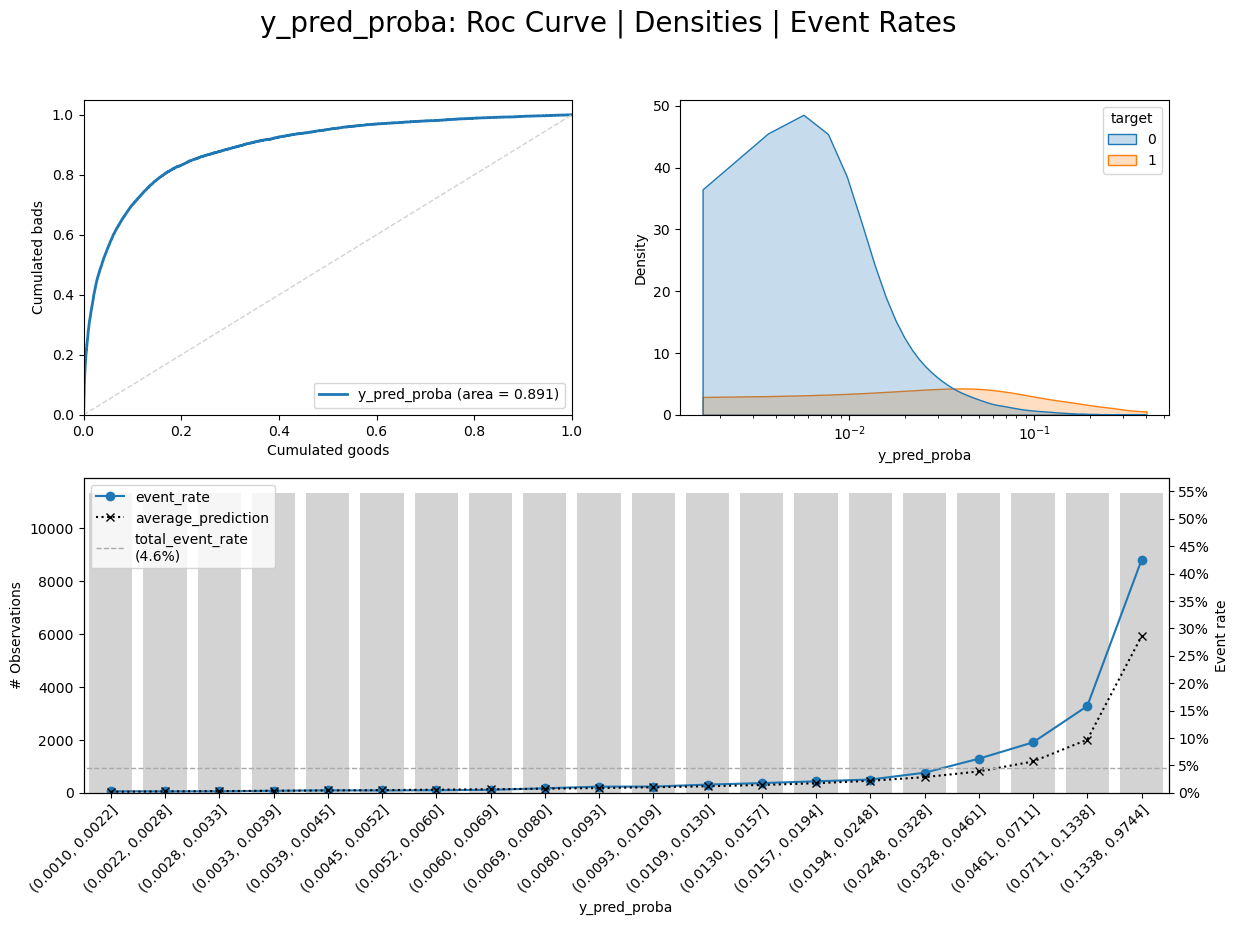

In [58]:
gov_within_150k = df_list['government'][df_list['government']['CR_LIMIT'] <= 150000]

metrics, fig = create_binary_target_plots(
    df=gov_within_150k,
    target_col="target",
    feature_col="y_pred_proba",
    n_bins=21,
    min_feature_val=None,
    max_feature_val=None,
    min_feature_q=None,
    max_feature_q=None,
    create_plot=True,
    invert_xaxis=False,
    use_quantiles=True,
    fillna=False,
    add_feature_means=True
)

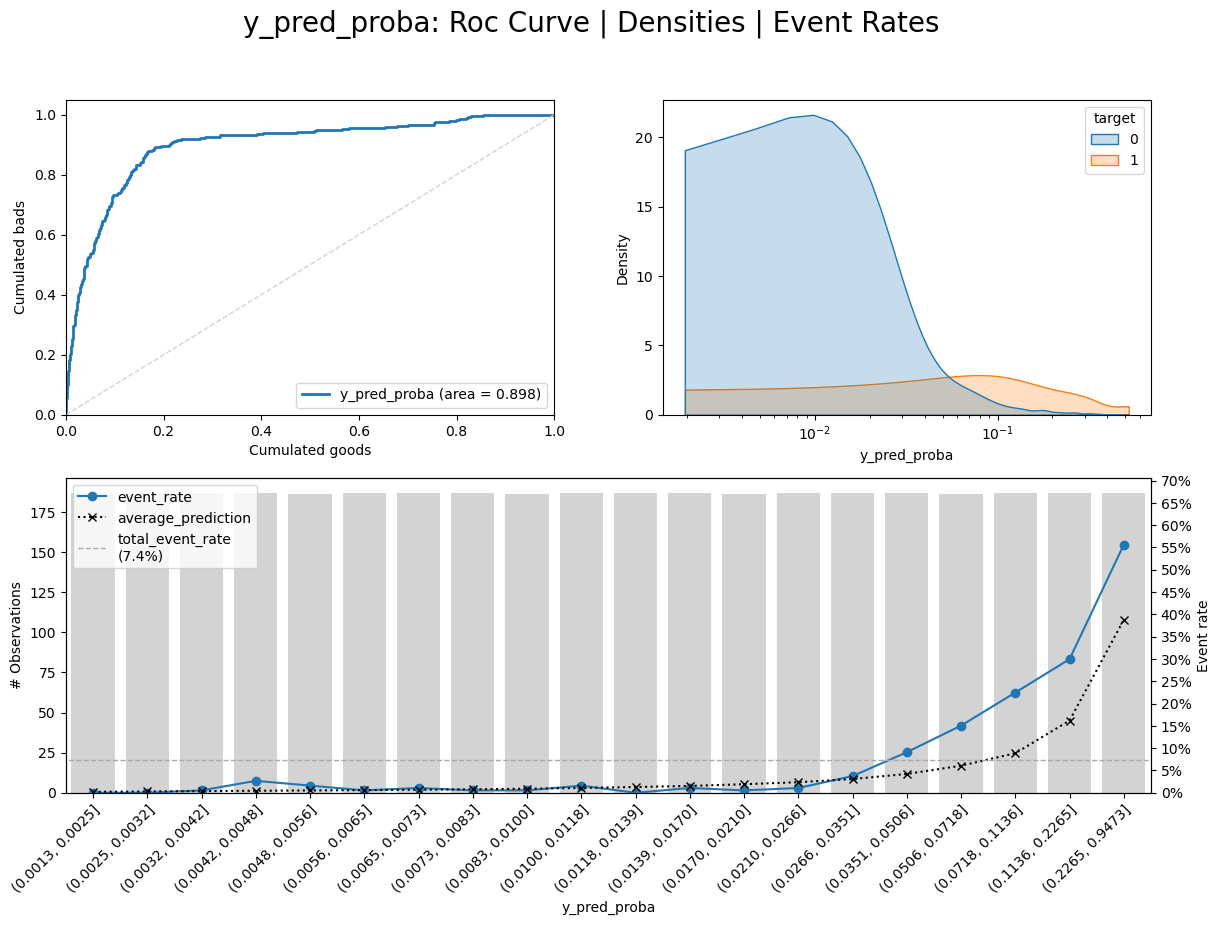

In [61]:
gov_morethan_150k = df_list['government'][df_list['government']['CR_LIMIT'] > 150000]

metrics, fig = create_binary_target_plots(
    df=gov_morethan_150k,
    target_col="target",
    feature_col="y_pred_proba",
    n_bins=21,
    min_feature_val=None,
    max_feature_val=None,
    min_feature_q=None,
    max_feature_q=None,
    create_plot=True,
    invert_xaxis=False,
    use_quantiles=True,
    fillna=False,
    add_feature_means=True
)

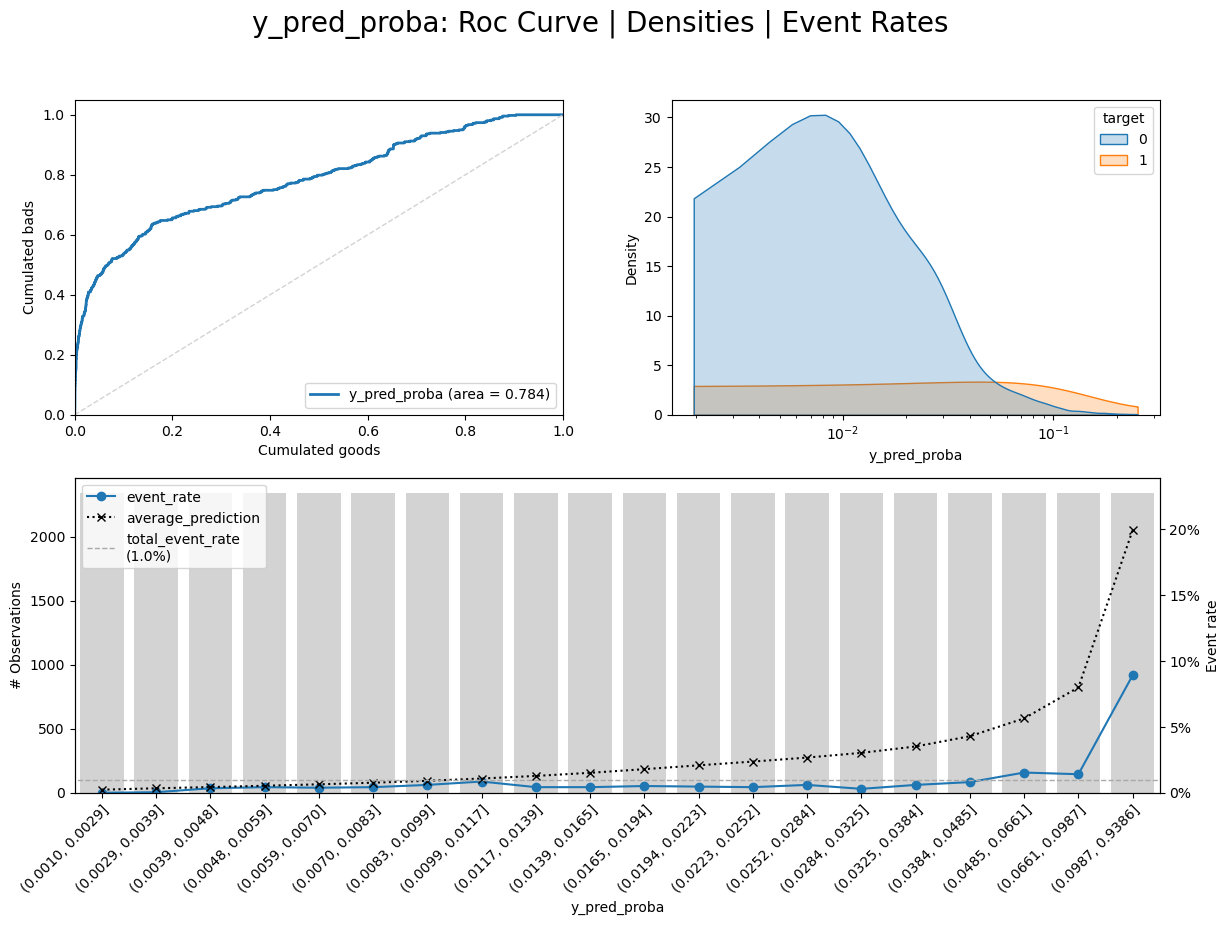

In [63]:
metrics, fig = create_binary_target_plots(
    df=df_list['vip_non_government'],
    target_col="target",
    feature_col="y_pred_proba",
    n_bins=21,
    min_feature_val=None,
    max_feature_val=None,
    min_feature_q=None,
    max_feature_q=None,
    create_plot=True,
    invert_xaxis=False,
    use_quantiles=True,
    fillna=False,
    add_feature_means=True
)

In [ ]:
# metrics, fig = create_binary_target_plots(
#     df=df_list['gov_vip_and_efps'],
#     target_col="target",
#     feature_col="y_pred_proba",
#     n_bins=11,
#     min_feature_val=None,
#     max_feature_val=None,
#     min_feature_q=None,
#     max_feature_q=None,
#     create_plot=True,
#     invert_xaxis=False,
#     use_quantiles=True,
#     fillna=False,
#     add_feature_means=True
# )

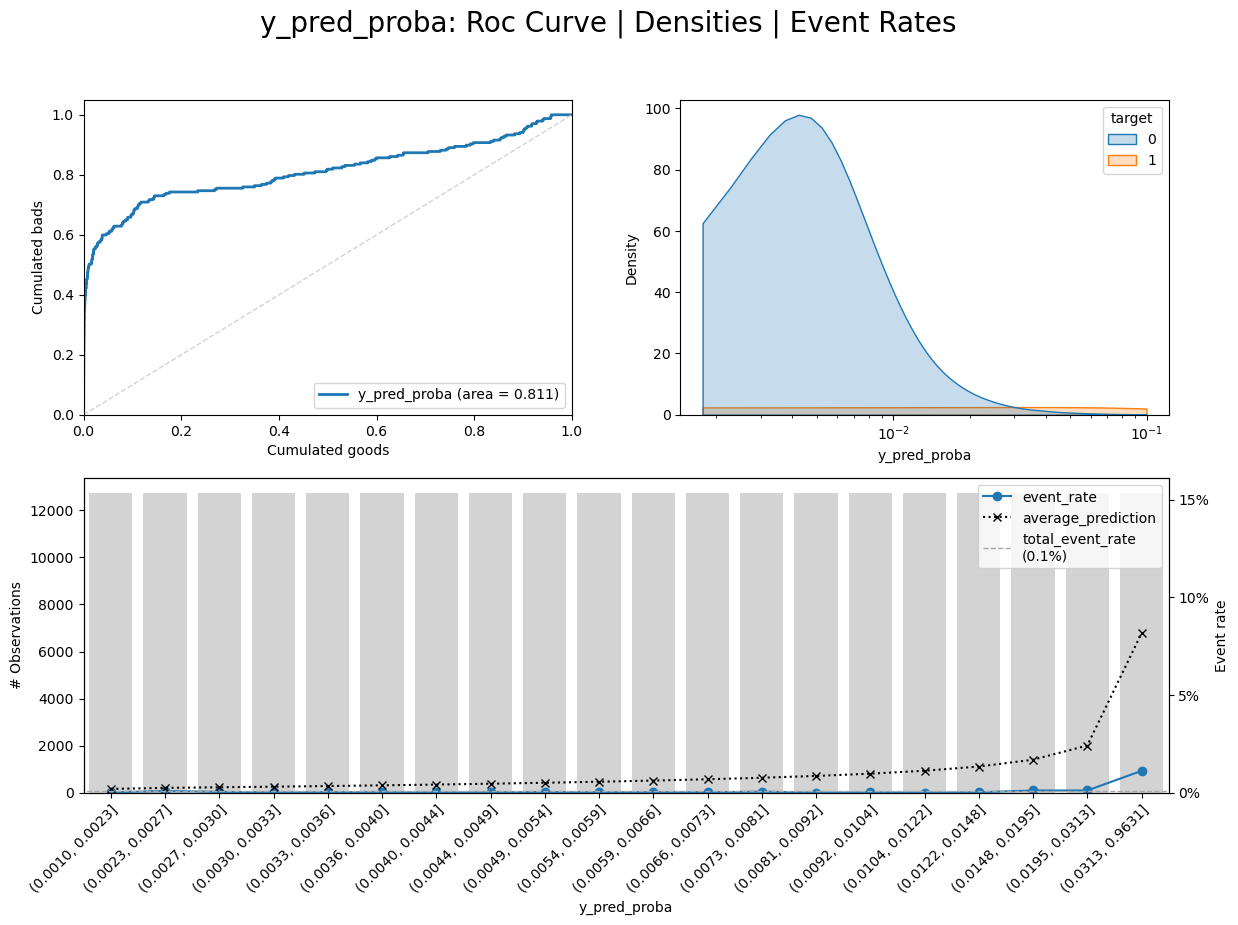

In [66]:
metrics, fig = create_binary_target_plots(
    df=df_list['efps'],
    target_col="target",
    feature_col="y_pred_proba",
    n_bins=21,
    min_feature_val=None,
    max_feature_val=None,
    min_feature_q=None,
    max_feature_q=None,
    create_plot=True,
    invert_xaxis=False,
    use_quantiles=True,
    fillna=False,
    add_feature_means=True
)

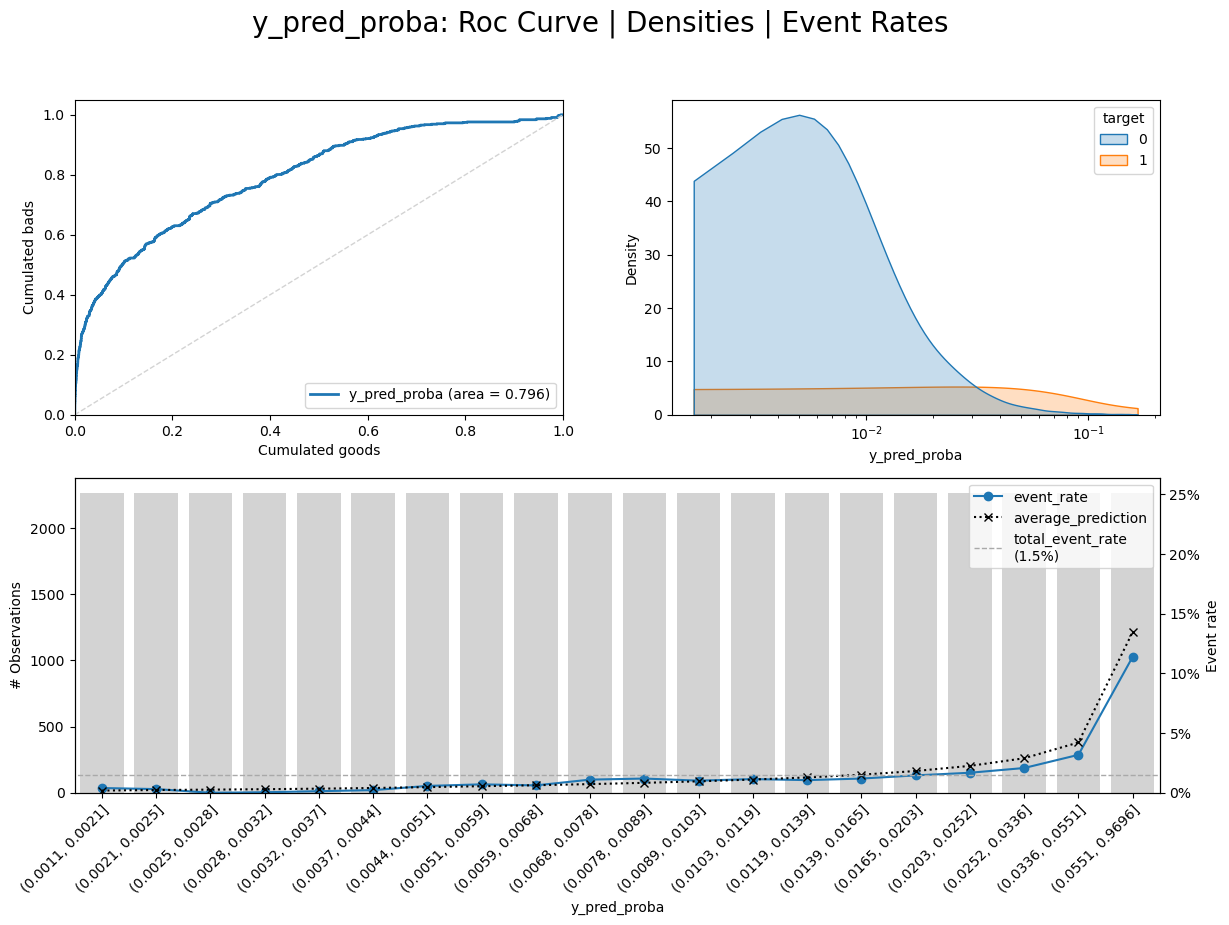

In [70]:
metrics, fig = create_binary_target_plots(
    df=df_list['large_credit_limit'],
    target_col="target",
    feature_col="y_pred_proba",
    n_bins=21,
    min_feature_val=None,
    max_feature_val=None,
    min_feature_q=None,
    max_feature_q=None,
    create_plot=True,
    invert_xaxis=False,
    use_quantiles=True,
    fillna=False,
    add_feature_means=True
)

In [ ]:
def roc_auc_pr_auc_plot(p):
    # Plot ROC-AUC and PR-AUC side by side
    plt.figure(figsize=(14, 4))

    plt.subplot(1, 2, 1)
    lines = plt.plot(fpr[p], tpr[p], color='#1f77b4', lw=2, label=f'proba_1 (ROC-AUC = {roc_auc[p]:.2f})')
    plt.plot([0, 1], [0, 1], color='grey', lw=.5, linestyle='--')
    labels = [l.get_label() for l in lines]
    # plot legend outside of plot
    plt.legend(lines, labels, loc='lower right')
    plt.xlabel('False Positive Rate', fontsize=10)
    plt.ylabel('True Positive Rate', fontsize=10)
    plt.xticks(fontsize=9)
    plt.yticks(fontsize=9)
    plt.title('Receiver Operating Characteristic (ROC) AUC Curve' , fontsize=12)

    plt.subplot(1, 2, 2)
    lines2 = plt.step(recall[p], precision[p], color='#ffc08a', where='post', label=f'proba_1 (PR-AUC = {pr_auc[p]:.2f})')
    labels2 = [l.get_label() for l in lines2]
    # move legend to lower center outside of plot
    plt.legend(lines2, labels2, loc='lower left')
    plt.xlabel('Recall', fontsize=10)
    plt.ylabel('Precision', fontsize=10)
    plt.xticks(fontsize=9)
    plt.yticks(fontsize=9)
    plt.title(f'Precision-Recall AUC Curve', fontsize=12)

    # plt.tight_layout()
    plt.show()

In [ ]:
for p in fpr:
    print(p)

Inclusion
Government
VIP Non Government
EFPS
Large Credit Limit


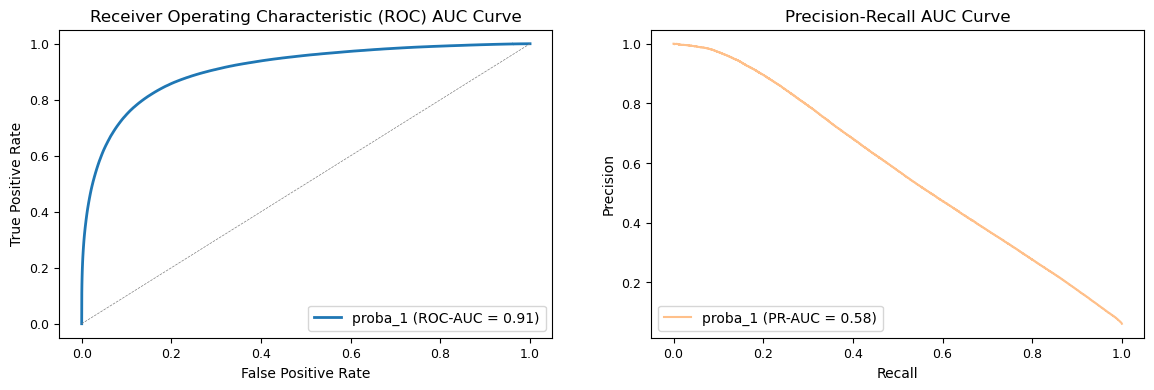

In [ ]:
roc_auc_pr_auc_plot('Inclusion')

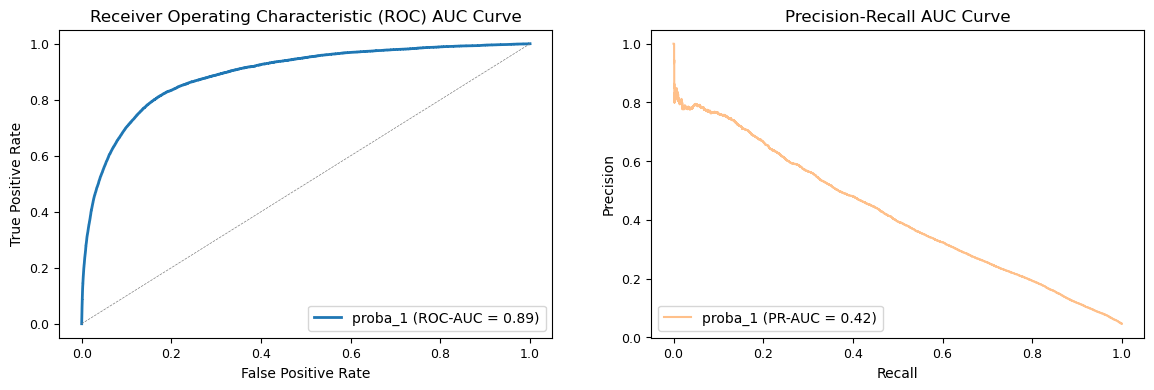

In [ ]:
roc_auc_pr_auc_plot('Government')

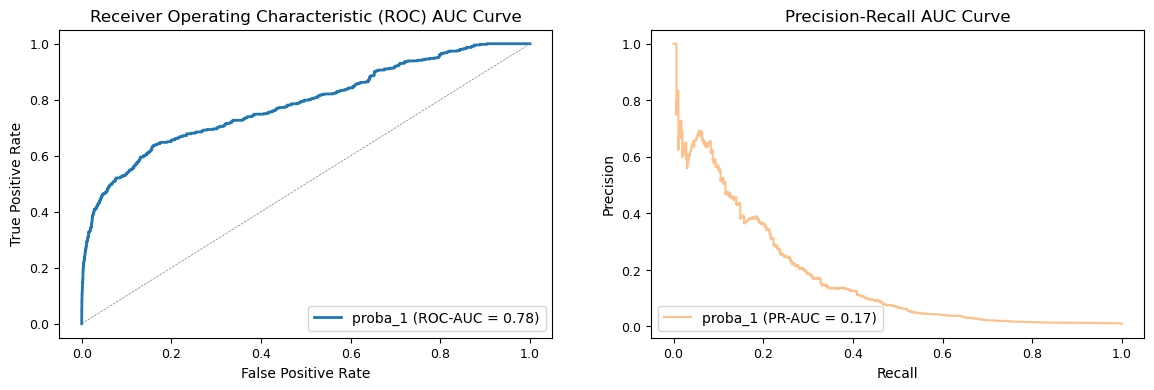

In [ ]:
roc_auc_pr_auc_plot('VIP Non Government')

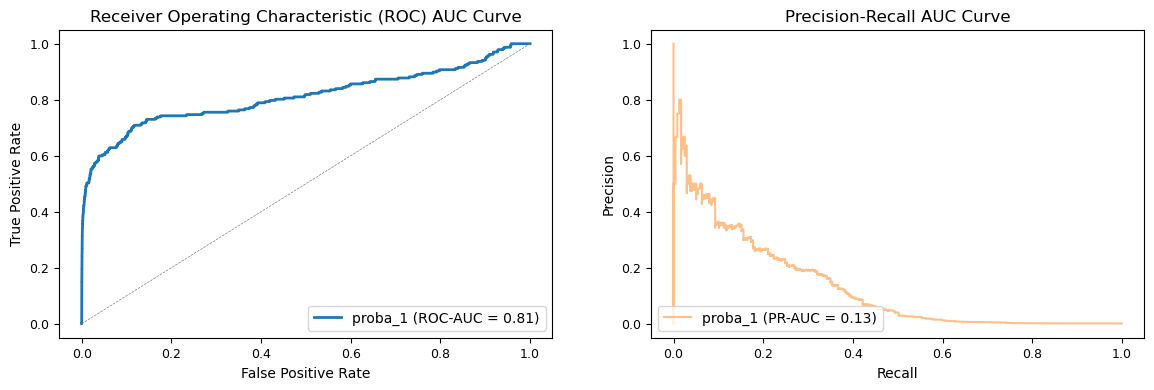

In [ ]:
roc_auc_pr_auc_plot('EFPS')

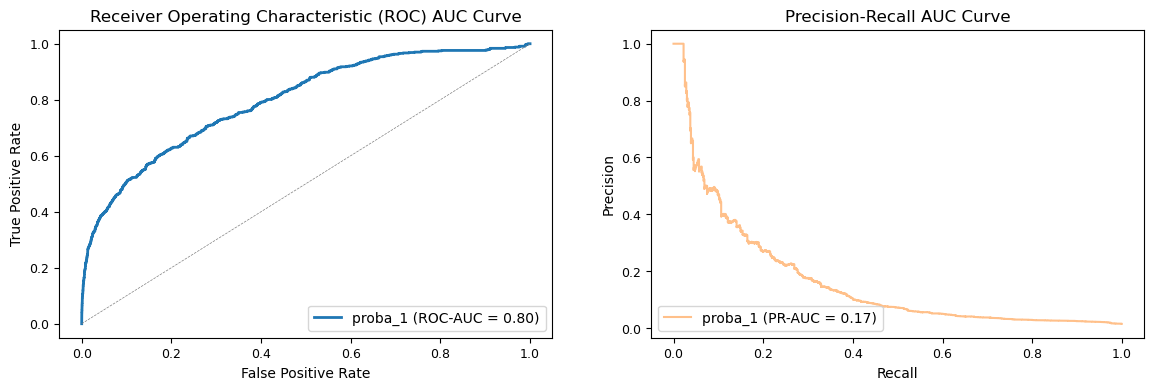

In [ ]:
roc_auc_pr_auc_plot('Large Credit Limit')

In [ ]:
inclusion_decile = calculate_decile_table_cl_bucket(df_list['inclusion'])
gov_decile = calculate_decile_table_cl_bucket(df_list['government'])
vip_decile = calculate_decile_table_cl_bucket(df_list['vip_non_government'])
# gov_vip_decile = calculate_decile_table_cl_bucket(df_list['gov_vip_and_efps'])
efps_decile = calculate_decile_table_cl_bucket(df_list['efps'])
large_credit_decile = calculate_decile_table_cl_bucket(df_list['large_credit_limit'])

In [ ]:
def cr_limit_lift_curve(name, df_binned):
    event_rate = df_binned["TOTAL_EVENT_RATE"].astype(float).mean()

    # Build event rate plot
    fig = plt.figure(figsize=(12,4))

    # Plot barplot containing number of observations
    plt.bar(df_binned.index, df_binned["COUNT"], color="lightgray")

    # Add ticks & laels to axis
    plt.xlabel("CR_LIMIT_BUCKET")
    plt.ylabel("# Observations")
    plt.xticks(df_binned.index, df_binned["CR_LIMIT_RANGE"], rotation=45, ha='right', rotation_mode='anchor')
    plt.title(f"{name}: CR_LIMIT_BUCKET Lift Curve")

    # Mirror plot and add event rates
    plt2 = plt.twinx()
    plt2.set_ylabel("Event rate")
    plt2.set_ylim(ymin=0, ymax=df_binned["DEFAULT_RATE"].max() + 0.1)
    plt2.set_yticks(np.arange(0, df_binned["AVG_PROB"].max() + 0.1, step=0.02))
    plt2.plot(
        df_binned.index, df_binned["DEFAULT_RATE"], label="event_rate", marker="o"
    )

    # add average prediction
    plt2.plot(
        df_binned.index,
        df_binned["AVG_PROB"],
        label="average_prediction",
        marker="x",
        linestyle=":",
        color="black"
    )

    # Add global event rate as baseline
    plt2.plot(
        [min(df_binned.index) - 1, max(df_binned.index) + 1],
        [event_rate, event_rate],
        color="darkgrey",
        lw=1,
        linestyle="--",
        label=f"total_event_rate\n({'{:.1%}'.format(event_rate)})",
    )
    plt2.legend(loc=0)
    plt2.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0))

    plt2.yaxis.grid(False)
    plt2.set_xlim([min(df_binned.index) - 0.5, max(df_binned.index) + 0.5])

    plt.show()

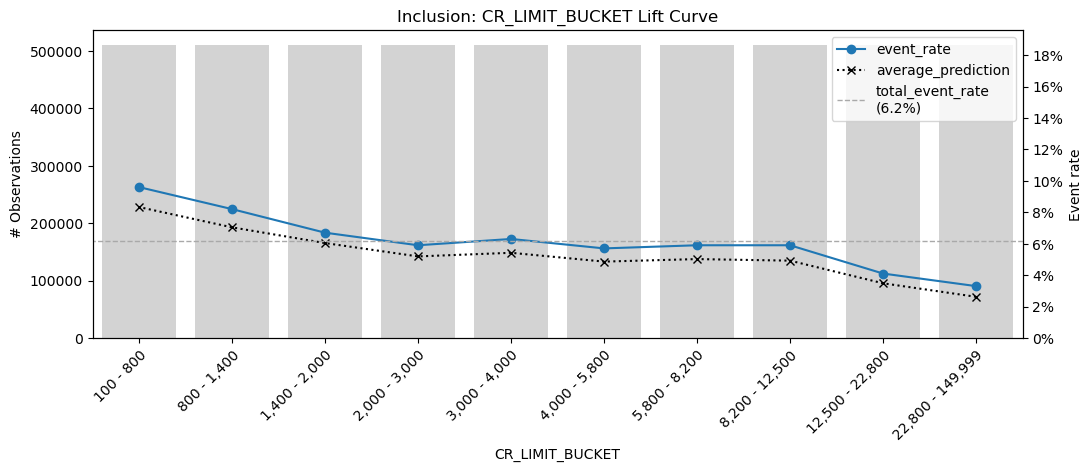

In [ ]:
cr_limit_lift_curve('Inclusion', inclusion_decile)

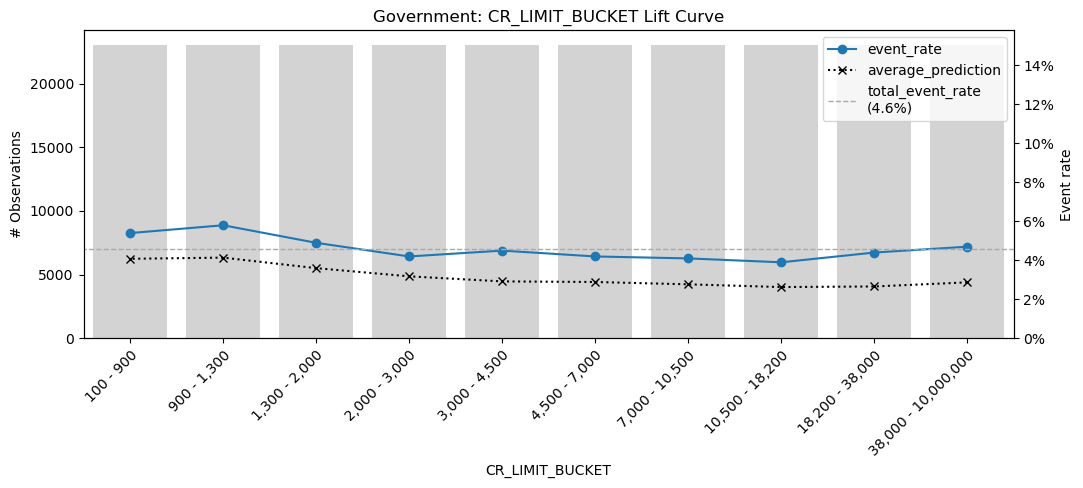

In [ ]:
cr_limit_lift_curve('Government', gov_decile)

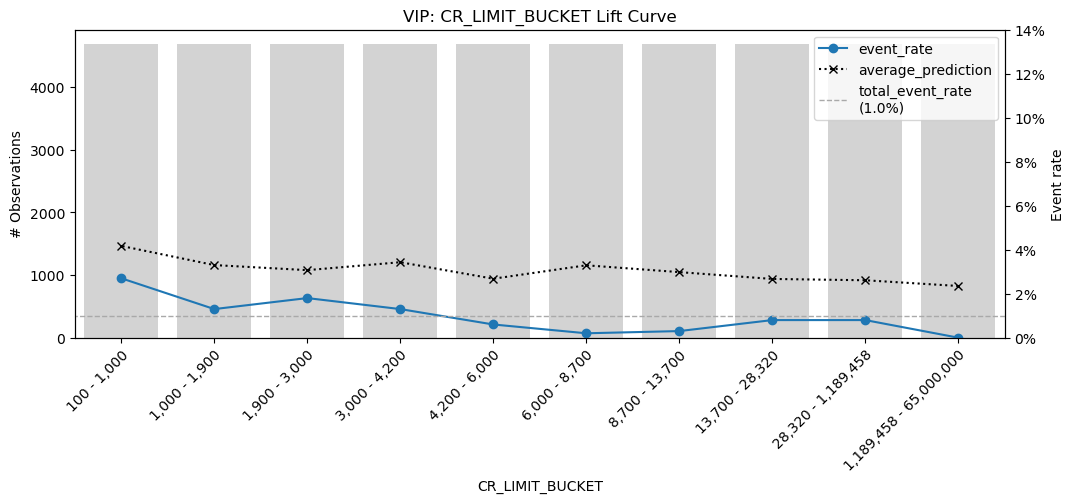

In [ ]:
cr_limit_lift_curve('VIP', vip_decile)

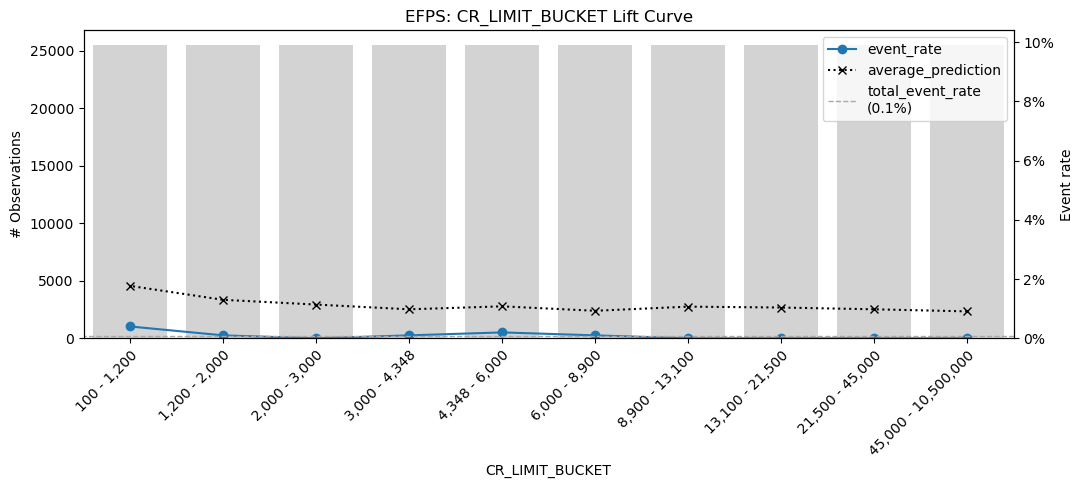

In [ ]:
cr_limit_lift_curve('EFPS', efps_decile)

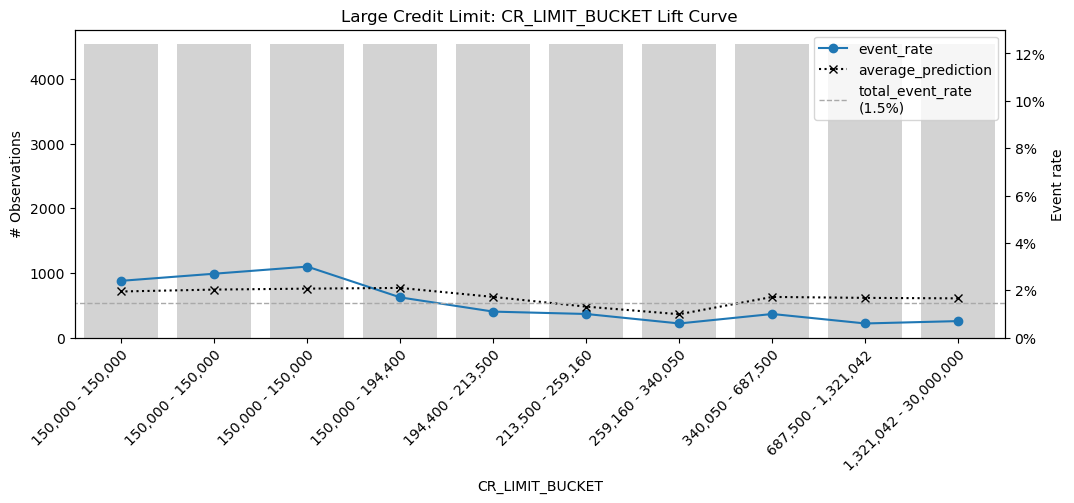

In [ ]:
cr_limit_lift_curve('Large Credit Limit', large_credit_decile)

In [ ]:
def calculate_decile_table_cl_bucket_manual(binded, feature, buckets, n):
    # Using mapping_dict to create CR_LIMIT_BUCKET. Each bucket will be greater than the value in mapping_dict
    # binded["CR_LIMIT_BUCKET"] = binded[feature].map(mapping_dict)
    binded["TOTAL_EVENT_RATE"] =  binded["target"].mean()

    # binded = binded.sort_values("CR_LIMIT", ascending = False)
    binded["CR_LIMIT_BUCKET"] = pd.cut(binded["CR_LIMIT"], bins = buckets, labels = list(range(0, n, 1)))
    binded["TOTAL_EVENT_RATE"] =  binded["target"].mean()

    # Calculate the number of accounts and default accounts for each decile
    decile_df = binded.groupby("CR_LIMIT_BUCKET").agg(
        COUNT=("CR_LIMIT", "count"),
        DEFAULT=("target", "sum"),
        TOTAL_EVENT_RATE=("TOTAL_EVENT_RATE", "mean")
    ).reset_index()

    # Calculate the predicted probability range for each decile
    decile_df["CR_LIMIT_RANGE"] = binded.groupby("CR_LIMIT_BUCKET")["CR_LIMIT"].agg(["min", "max"]).apply(lambda x: f"{x['min']:,.0f} - {x['max']:,.0f}", axis=1).values
    
    # decile_df["CR_LIMIT_MIN"] = binded.groupby("CR_LIMIT_BUCKET")["CR_LIMIT"].agg(["min"])
    # decile_df["CR_LIMIT_MIN"] = decile_df["CR_LIMIT_MIN"].apply(lambda n: numerize.numerize(n))
    
    # decile_df["CR_LIMIT_MAX"] = binded.groupby("CR_LIMIT_BUCKET")["CR_LIMIT"].agg(["max"])
    # decile_df["CR_LIMIT_MAX"] = decile_df["CR_LIMIT_MAX"].apply(lambda n: numerize.numerize(n))

    # decile_df["CR_LIMIT_RANGE"] = decile_df["CR_LIMIT_MIN"] + " - " + decile_df["CR_LIMIT_MAX"]

    decile_df["AVG_CL_LIMIT"] = binded.groupby("CR_LIMIT_BUCKET")["CR_LIMIT"].agg(["mean"]).values
    decile_df["AVG_CL_LIMIT"] = round(decile_df["AVG_CL_LIMIT"]).astype(int).apply(lambda x: "{:,}".format(x))

    # Calculate the predicted probability range for each decile
    decile_df["PROB_RANGE"] = binded.groupby("CR_LIMIT_BUCKET")["y_pred_proba"].agg(["min", "max"]).apply(lambda x: f"{x['min']:.3f} - {x['max']:.3f}", axis=1).values
    decile_df["AVG_PROB"] = binded.groupby("CR_LIMIT_BUCKET")["y_pred_proba"].agg(["mean"]).values
    decile_df["AVG_PROB"] = round(decile_df["AVG_PROB"], 4)

    # sort dataframes by decile
    decile_df = decile_df.sort_values(by="CR_LIMIT_BUCKET", ascending=False)

    # Calculate the cumulative number of accounts and default accounts
    decile_df["CUM_COUNT"] = round(decile_df["COUNT"].cumsum(),0)
    decile_df["CUM_DEFAULT"] = decile_df["DEFAULT"].cumsum()

    # Calculate the cumulative percentage of accounts and default accounts
    decile_df["CUM_PCT_COUNT"] = round(decile_df["CUM_COUNT"] / decile_df["COUNT"].sum() * 100, 3)
    decile_df["CUM_PCT_DEFAULT"] = round((decile_df["CUM_DEFAULT"] / decile_df["DEFAULT"].sum()), 3)

    # Calculate the default rate for each decile
    decile_df["DEFAULT_RATE"] = round((decile_df["DEFAULT"] / decile_df["COUNT"]), 3)

    # Calculate gain for each decile
    decile_df["GAIN"] = round((decile_df["CUM_DEFAULT"] / binded["target"].sum()), 3)

    # Calculate the lift for each decile
    decile_df["LIFT"] = round((decile_df["GAIN"]*100) / (decile_df["CUM_PCT_COUNT"]), 3)

    cols_to_display = [
        "CR_LIMIT_BUCKET",
        "CR_LIMIT_RANGE", 
        "AVG_CL_LIMIT", "PROB_RANGE", "AVG_PROB", "COUNT", "DEFAULT_RATE", "TOTAL_EVENT_RATE", "CUM_COUNT", "CUM_DEFAULT", "CUM_PCT_DEFAULT",
        "GAIN", "LIFT", "CUM_PCT_COUNT"
    ]

    decile_df = decile_df[cols_to_display]

    return decile_df

,CR_LIMIT_BUCKET,CR_LIMIT_RANGE,AVG_CL_LIMIT,PROB_RANGE,AVG_PROB,COUNT,DEFAULT_RATE,TOTAL_EVENT_RATE,CUM_COUNT,CUM_DEFAULT,CUM_PCT_DEFAULT,GAIN,LIFT,CUM_PCT_COUNT
9,9,"140,075 - 149,999","145,336",0.001 - 0.877,0.0183,3205,0.023,0.061608,3205,73,0.000,0.000,0.000,0.063
8,8,"120,042 - 140,000","129,863",0.001 - 0.964,0.0218,9840,0.032,0.061608,13045,385,0.001,0.001,0.392,0.255
7,7,"100,029 - 120,000","110,962",0.001 - 0.984,0.0212,17903,0.028,0.061608,30948,881,0.003,0.003,0.495,0.606
6,6,"50,029 - 100,000","69,871",0.001 - 0.990,0.0236,130169,0.031,0.061608,161117,4885,0.016,0.016,0.507,3.154
5,5,"25,001 - 50,000","35,167",0.001 - 0.990,0.0268,278436,0.033,0.061608,439553,14167,0.045,0.045,0.523,8.604
4,4,"10,001 - 25,000","15,935",0.001 - 0.990,0.0349,798962,0.041,0.061608,1238515,46637,0.148,0.148,0.610,24.243
3,3,"5,000 - 10,000","7,450",0.001 - 0.991,0.0497,954438,0.059,0.061608,2192953,103405,0.329,0.329,0.766,42.926
2,2,"2,500 - 5,000","3,761",0.001 - 0.989,0.0519,1046862,0.060,0.061608,3239815,166350,0.529,0.529,0.834,63.418
1,1,"1,000 - 2,500","1,773",0.001 - 0.987,0.0581,1094171,0.066,0.061608,4333986,238152,0.757,0.757,0.892,84.836
0,0,"100 - 1,000",705,0.001 - 0.986,0.0849,774676,0.099,0.061608,5108662,314732,1.000,1.000,1.000,100.000


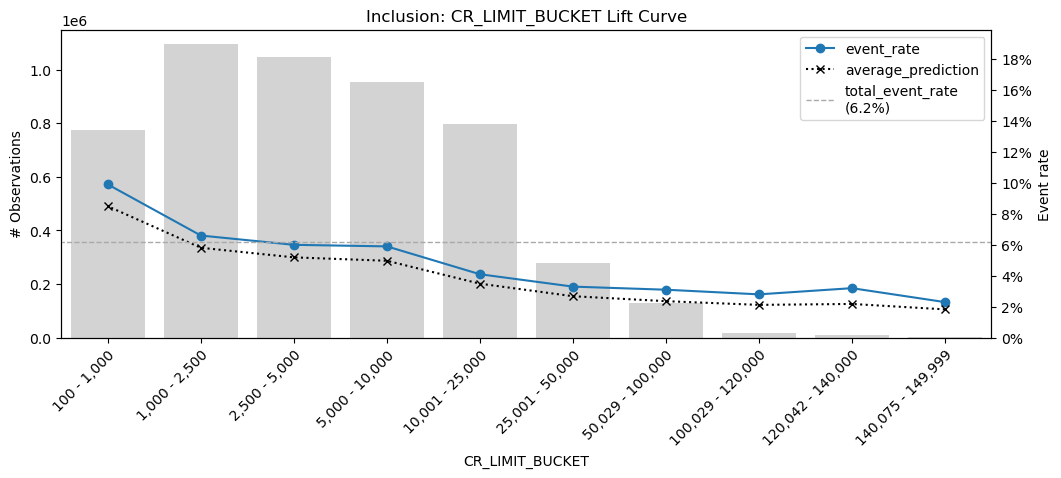

In [ ]:
mapping_dict = {0: 1000,
                1: 2500,
                3: 5000,
                4: 10000,
                5: 25000,
                6: 50000,
                7: 100000,
                8: 120000,
                9: 140000,
                # 10: 1000000,
                # 11: 2000000,
                12: np.inf
}

inclusion_buckets = [-np.inf]
n = len(mapping_dict)

for m in mapping_dict:
    inclusion_buckets.append(mapping_dict[m])

inclusion_decile_manual = calculate_decile_table_cl_bucket_manual(df_list['inclusion'], 'y_pred_proba', inclusion_buckets, n)
display(inclusion_decile_manual)

cr_limit_lift_curve('Inclusion', inclusion_decile_manual)

,CR_LIMIT_BUCKET,CR_LIMIT_RANGE,AVG_CL_LIMIT,PROB_RANGE,AVG_PROB,COUNT,DEFAULT_RATE,TOTAL_EVENT_RATE,CUM_COUNT,CUM_DEFAULT,CUM_PCT_DEFAULT,GAIN,LIFT,CUM_PCT_COUNT
11,11,"2,150,000 - 10,000,000","4,648,920",0.002 - 0.736,0.0650,202,0.030,0.04605,202,6,0.001,0.001,1.136,0.088
10,10,"1,019,000 - 2,000,000","1,480,140",0.002 - 0.808,0.0546,443,0.059,0.04605,645,32,0.003,0.003,1.071,0.280
9,9,"510,000 - 1,000,000","768,240",0.002 - 0.947,0.0475,523,0.029,0.04605,1168,47,0.004,0.004,0.789,0.507
8,8,"155,200 - 500,000","272,188",0.001 - 0.806,0.0415,2568,0.089,0.04605,3736,276,0.026,0.026,1.603,1.622
7,7,"100,200 - 150,000","130,416",0.001 - 0.730,0.0238,3235,0.030,0.04605,6971,372,0.035,0.035,1.156,3.027
6,6,"50,100 - 100,000","71,531",0.001 - 0.808,0.0266,9539,0.047,0.04605,16510,824,0.078,0.078,1.088,7.168
5,5,"25,100 - 50,000","36,145",0.001 - 0.866,0.0251,16444,0.036,0.04605,32954,1423,0.134,0.134,0.937,14.308
4,4,"10,100 - 25,000","16,580",0.001 - 0.930,0.0263,37894,0.042,0.04605,70848,3006,0.283,0.283,0.920,30.761
3,3,"5,012 - 10,000","7,508",0.001 - 0.916,0.0269,36649,0.038,0.04605,107497,4403,0.415,0.415,0.889,46.674
2,2,"2,500 - 5,000","3,737",0.001 - 0.974,0.0315,41181,0.047,0.04605,148678,6345,0.598,0.598,0.926,64.554


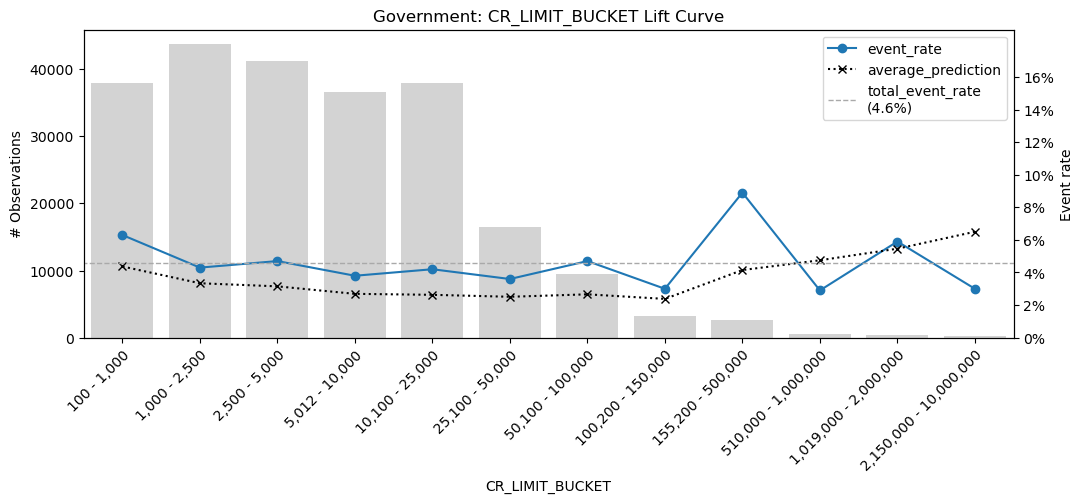

In [ ]:
mapping_dict = {0: 1000,
                1: 2500,
                3: 5000,
                4: 10000,
                5: 25000,
                6: 50000,
                7: 100000,
                8: 150000,
                9: 500000,
                10: 1000000,
                11: 2000000,
                12: np.inf
}

gov_buckets = [-np.inf]
n = len(mapping_dict)

for m in mapping_dict:
    gov_buckets.append(mapping_dict[m])

gov_decile_manual = calculate_decile_table_cl_bucket_manual(df_list['government'], 'y_pred_proba', gov_buckets, n)
display(gov_decile_manual)

cr_limit_lift_curve('Government', gov_decile_manual)

,CR_LIMIT_BUCKET,CR_LIMIT_RANGE,AVG_CL_LIMIT,PROB_RANGE,AVG_PROB,COUNT,DEFAULT_RATE,TOTAL_EVENT_RATE,CUM_COUNT,CUM_DEFAULT,CUM_PCT_DEFAULT,GAIN,LIFT,CUM_PCT_COUNT
11,11,"2,272,580 - 65,000,000","12,721,622",0.003 - 0.096,0.0259,356,0.000,0.009753,356,0,0.000,0.000,0.000,0.760
10,10,"1,065,000 - 2,000,000","1,244,153",0.002 - 0.218,0.0236,4539,0.000,0.009753,4895,0,0.000,0.000,0.000,10.446
9,9,"510,000 - 1,000,000","620,353",0.002 - 0.420,0.0320,73,0.000,0.009753,4968,0,0.000,0.000,0.000,10.602
8,8,"150,767 - 500,000","253,820",0.002 - 0.419,0.0395,433,0.000,0.009753,5401,0,0.000,0.000,0.000,11.526
7,7,"100,733 - 150,000","128,234",0.001 - 0.365,0.0183,449,0.000,0.009753,5850,0,0.000,0.000,0.000,12.484
6,6,"50,200 - 100,000","71,508",0.001 - 0.819,0.0257,1285,0.016,0.009753,7135,20,0.044,0.044,0.289,15.227
5,5,"25,100 - 50,000","35,829",0.001 - 0.810,0.0256,2656,0.007,0.009753,9791,39,0.085,0.085,0.407,20.895
4,4,"10,100 - 25,000","16,237",0.001 - 0.536,0.0265,6659,0.006,0.009753,16450,79,0.173,0.173,0.493,35.105
3,3,"5,040 - 10,000","7,468",0.001 - 0.939,0.0310,8709,0.004,0.009753,25159,110,0.241,0.241,0.449,53.691
2,2,"2,550 - 5,000","3,858",0.001 - 0.913,0.0317,8616,0.010,0.009753,33775,200,0.438,0.438,0.608,72.078


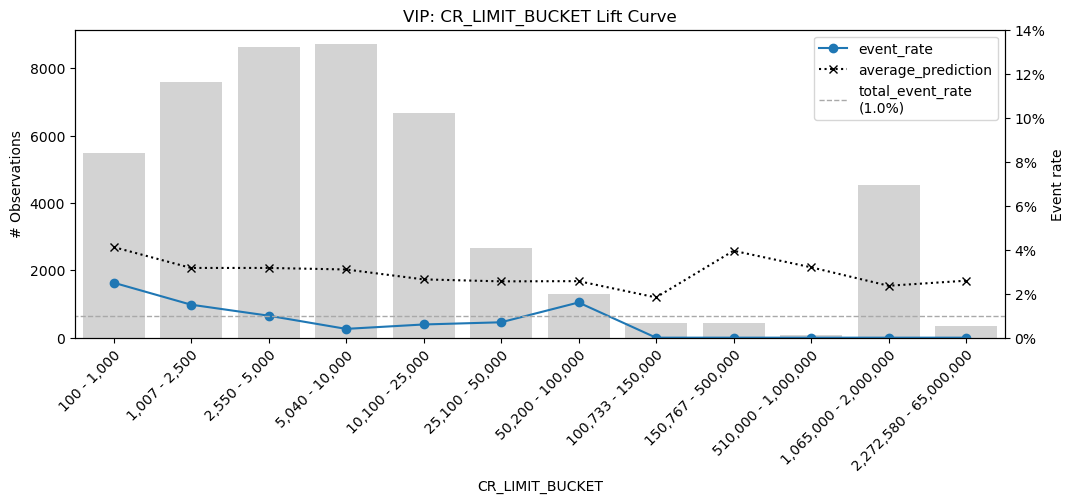

In [ ]:
mapping_dict = {0: 1000,
                1: 2500,
                3: 5000,
                4: 10000,
                5: 25000,
                6: 50000,
                7: 100000,
                8: 150000,
                9: 500000,
                10: 1000000,
                11: 2000000,
                12: np.inf
}

vip_buckets = [-np.inf]
n = len(mapping_dict)

for m in mapping_dict:
    vip_buckets.append(mapping_dict[m])

vip_decile_manual = calculate_decile_table_cl_bucket_manual(df_list['vip_non_government'], 'y_pred_proba', vip_buckets, n)
display(vip_decile_manual)

cr_limit_lift_curve('VIP', vip_decile_manual)

,CR_LIMIT_BUCKET,CR_LIMIT_RANGE,AVG_CL_LIMIT,PROB_RANGE,AVG_PROB,COUNT,DEFAULT_RATE,TOTAL_EVENT_RATE,CUM_COUNT,CUM_DEFAULT,CUM_PCT_DEFAULT,GAIN,LIFT,CUM_PCT_COUNT
10,10,"2,230,000 - 10,500,000","5,748,869",0.003 - 0.167,0.0197,107,0.000,0.00093,107,0,0.000,0.000,0.000,0.042
9,9,"1,007,300 - 2,000,000","1,452,425",0.002 - 0.134,0.0165,75,0.000,0.00093,182,0,0.000,0.000,0.000,0.071
8,8,"151,910 - 1,000,000","338,832",0.001 - 0.136,0.0103,3117,0.000,0.00093,3299,0,0.000,0.000,0.000,1.294
7,7,"100,100 - 150,000","132,824",0.001 - 0.199,0.0086,5957,0.000,0.00093,9256,0,0.000,0.000,0.000,3.631
6,6,"50,040 - 100,000","72,128",0.001 - 0.472,0.0087,12458,0.000,0.00093,21714,0,0.000,0.000,0.000,8.518
5,5,"25,000 - 50,000","35,803",0.001 - 0.734,0.0095,21678,0.000,0.00093,43392,10,0.042,0.042,0.247,17.021
4,4,"10,002 - 25,000","16,307",0.001 - 0.839,0.0102,47366,0.000,0.00093,90758,20,0.084,0.084,0.236,35.602
3,3,"5,001 - 10,000","7,444",0.001 - 0.922,0.0103,49594,0.001,0.00093,140352,54,0.228,0.228,0.414,55.056
2,2,"2,500 - 5,000","3,747",0.001 - 0.896,0.0103,49383,0.001,0.00093,189735,99,0.418,0.418,0.562,74.427
1,1,"1,004 - 2,500","1,799",0.001 - 0.948,0.0125,43225,0.001,0.00093,232960,155,0.654,0.654,0.716,91.383


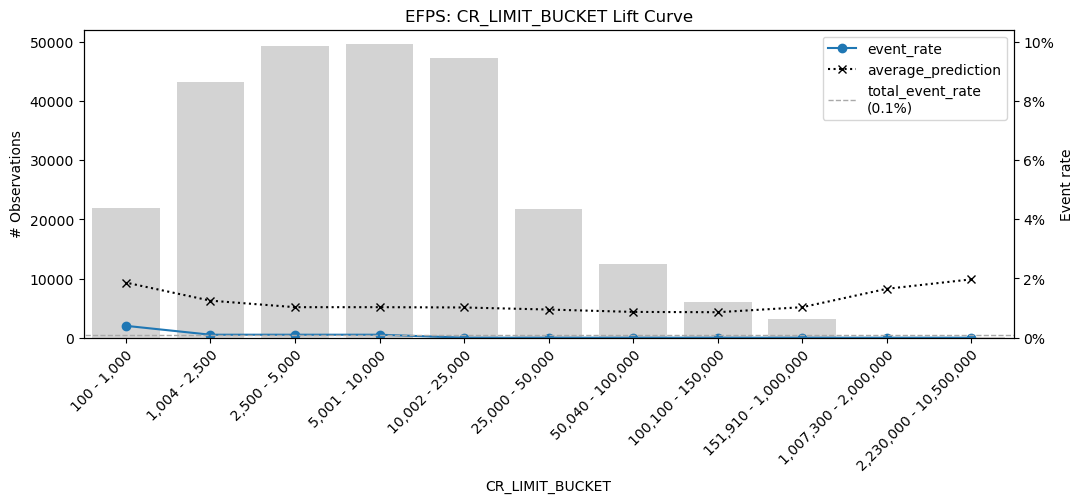

In [ ]:
mapping_dict = {0: 1000,
                1: 2500,
                3: 5000,
                4: 10000,
                5: 25000,
                6: 50000,
                7: 100000,
                8: 150000,
                9: 1000000,
                # 10: 1500000,
                11: 2000000,
                12: np.inf
}

efps_buckets = [-np.inf]
n = len(mapping_dict)

for m in mapping_dict:
    efps_buckets.append(mapping_dict[m])

efps_decile_manual = calculate_decile_table_cl_bucket_manual(df_list['efps'], 'y_pred_proba', efps_buckets, n)
display(efps_decile_manual)

cr_limit_lift_curve('EFPS', efps_decile_manual)

,CR_LIMIT_BUCKET,CR_LIMIT_RANGE,AVG_CL_LIMIT,PROB_RANGE,AVG_PROB,COUNT,DEFAULT_RATE,TOTAL_EVENT_RATE,CUM_COUNT,CUM_DEFAULT,CUM_PCT_DEFAULT,GAIN,LIFT,CUM_PCT_COUNT
8,8,"10,028,000 - 30,000,000","16,775,852",0.004 - 0.204,0.0424,89,0.157,0.01474,89,14,0.021,0.021,10.714,0.196
7,7,"2,008,961 - 10,000,000","4,350,210",0.002 - 0.483,0.0324,672,0.022,0.01474,761,29,0.043,0.043,2.561,1.679
6,6,"1,000,600 - 2,000,000","1,378,032",0.002 - 0.403,0.0146,5901,0.000,0.01474,6662,30,0.045,0.045,0.306,14.700
5,5,"501,700 - 1,000,000","720,989",0.002 - 0.850,0.0163,4228,0.013,0.01474,10890,85,0.127,0.127,0.529,24.029
4,4,"400,596 - 500,000","464,525",0.001 - 0.520,0.0232,1225,0.009,0.01474,12115,96,0.144,0.144,0.539,26.732
3,3,"300,398 - 400,000","346,738",0.001 - 0.464,0.0102,2915,0.009,0.01474,15030,121,0.181,0.181,0.546,33.164
2,2,"200,100 - 300,000","250,889",0.001 - 0.846,0.0128,8411,0.007,0.01474,23441,177,0.265,0.265,0.512,51.723
1,1,"150,163 - 200,000","185,913",0.001 - 0.901,0.0195,7364,0.013,0.01474,30805,270,0.404,0.404,0.594,67.972
0,0,"150,000 - 150,000","150,000",0.001 - 0.970,0.0200,14515,0.027,0.01474,45320,668,1.000,1.000,1.000,100.000


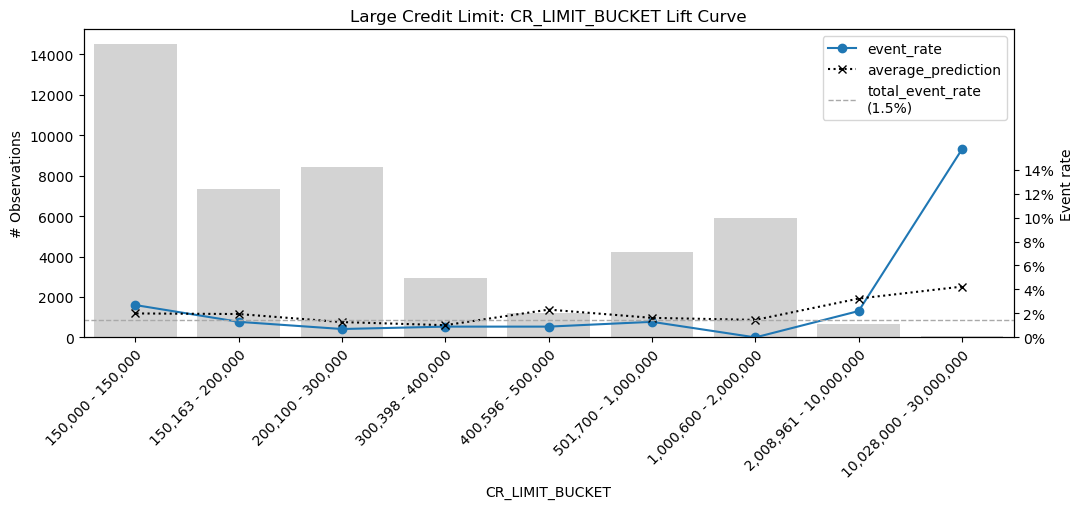

In [ ]:
mapping_dict = {0: 150000,
                1: 200000,
                2: 300000,
                3: 400000,
                4: 500000,
                # 5: 600000,
                # 6: 700000,
                # 7: 800000,
                # 8: 900000,
                9: 1000000,
                10: 2000000,
                11: 10000000,
                12: np.inf
}

large_credit_limit_buckets = [-np.inf]
n = len(mapping_dict)

for m in mapping_dict:
    large_credit_limit_buckets.append(mapping_dict[m])

large_credit_limit_decile_manual = calculate_decile_table_cl_bucket_manual(df_list['large_credit_limit'], 'y_pred_proba', large_credit_limit_buckets, n)
display(large_credit_limit_decile_manual)

cr_limit_lift_curve('Large Credit Limit', large_credit_limit_decile_manual)

In [ ]:
import sys
sys.path.append("C:/Users/w510663/Desktop/Pyri/connections/")
from conn import snowflake_conn

# Get execution time
st = time.time()

conn = snowflake_conn()
cur = conn.cursor()

cur.execute('''
    SELECT *
    FROM "DATAIKU_ANALYTICS_SUB"."RISK_FRAUD"."RDS_NAF_PM_EXCL_GOV_SUBPRESS_DNB_LN_SCORING" 
;
''')
gov_dnb_ln_suppressed = pd.DataFrame.from_records(iter(cur), columns=[x[0] for x in cur.description])

et = time.time()
elapsed_time = et - st
print('Data Shape:', gov_dnb_ln_suppressed.shape, 
      '\nExecution time:', elapsed_time / 60, 'minutes')

gov_dnb_ln_suppressed.shape

Data Shape: (230315, 35) 
Execution time: 0.20804879268010457 minutes


(230315, 35)

In [ ]:
cols_rename_map = {'CUST_ID': 'ID',
                   'FLAG_60_DPD_366_DAYS': 'target',
                   'proba_1': 'y_pred_proba',
                   'prediction': 'y_pred'
}

gov_dnb_ln_suppressed.rename(cols_rename_map, axis=1, inplace=True)

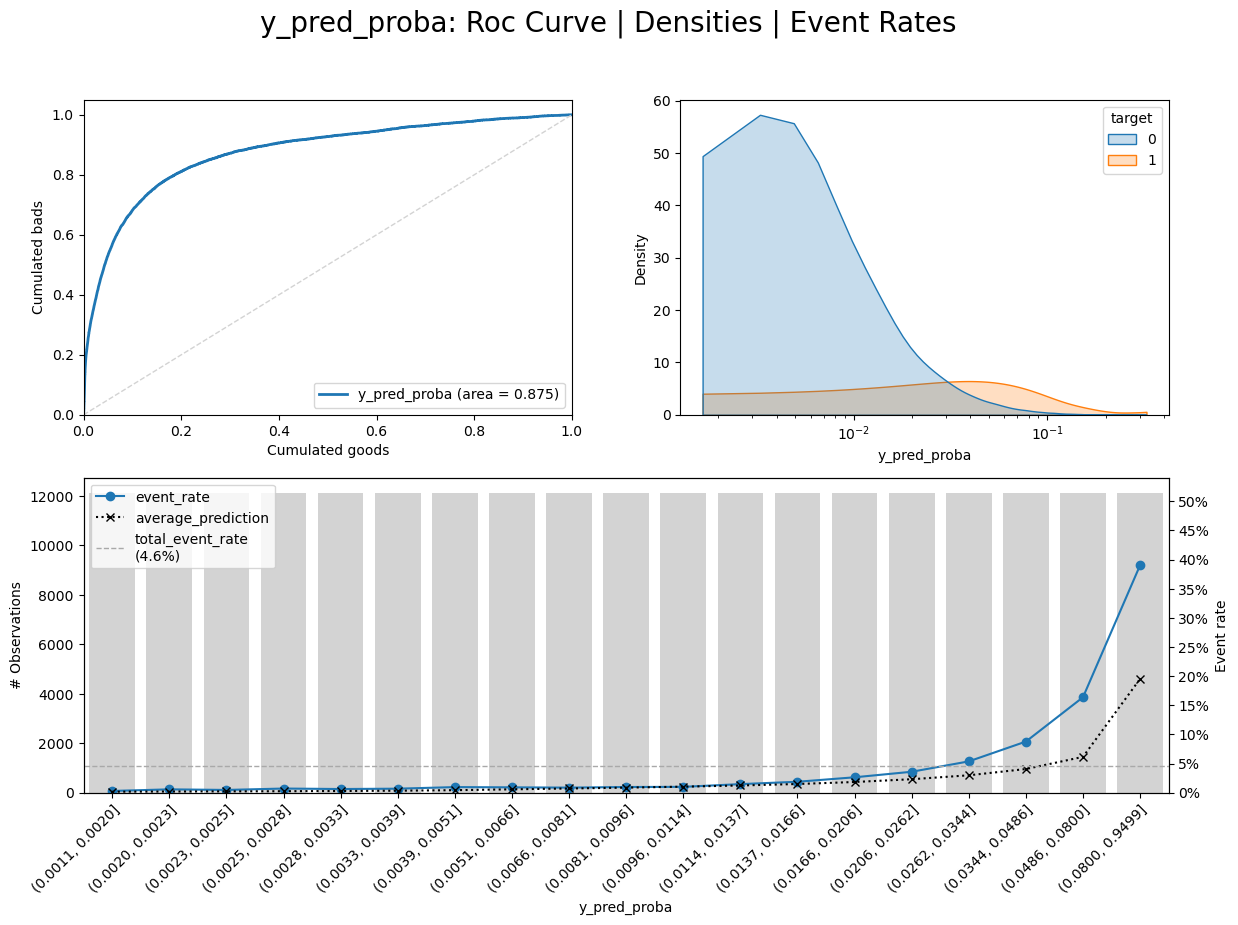

In [ ]:
metrics, fig = create_binary_target_plots(
    df=gov_dnb_ln_suppressed,
    target_col="target",
    feature_col="y_pred_proba",
    n_bins=20,
    min_feature_val=None,
    max_feature_val=None,
    min_feature_q=None,
    max_feature_q=None,
    create_plot=True,
    invert_xaxis=False,
    use_quantiles=True,
    fillna=False,
    add_feature_means=True
)

In [ ]:
# join gov_dnb_ln_suppressed with df_list['government'] on ID, SET_ID, and REF_DATE to get CR_LIMIT column
gov_dnb_ln_suppressed = gov_dnb_ln_suppressed.merge(df_list['government'][['ID', 'REF_DATE', 'CR_LIMIT']], how='left', on=['ID', 'REF_DATE'])
gov_dnb_ln_suppressed.head()

,ID,SETID,REF_DATE,A_NAICS_2_DIGIT_C,A_TENURE_MONTHS_N,A_FLAG_REVOLVER_B,A_YEARS_IN_BUSINESS_APP_N,A_FLEET_SIZE_APP_N,D_SPREAD_EXPOSURE_6M_N,D_MAX_DAYS_PAST_DUE_6M_N,...,target,FLAG_90_DPD_366_DAYS,A_BUSINESS_PROGRAM_C,A_MARKETING_CHANNEL_C,FLAG_CHARGEOFF_366_DAYS,A_PORTFOLIO_C,proba_0,y_pred_proba,y_pred,CR_LIMIT
0,9100003913776,FSC,2022-06-01 00:00:00-07:00,92,71,0,NaN,NaN,0.704424,15.0,...,0,0,Wright Express Fleet Universal,None,0,FSC,0.960814,0.039186,0,750.0
1,0444008178824,FSC,2022-07-01 00:00:00-07:00,62,150,0,NaN,NaN,0.637068,0.0,...,0,0,WEX Universal,None,0,FSC,0.995724,0.004276,0,21200.0
2,9100008723232,FSC,2022-07-01 00:00:00-07:00,92,18,0,50.0,10.0,0.343450,0.0,...,0,0,Sinclair Fleet Track,Organic Search,0,FSC,0.996678,0.003322,0,4000.0
3,9100007313868,FSC,2022-07-01 00:00:00-07:00,92,37,0,NaN,3.0,0.573216,0.0,...,0,0,Wright Express Fleet Universal,Direct Mail,0,FSC,0.997033,0.002967,0,4800.0
4,9100004772214,FSC,2022-07-01 00:00:00-07:00,56,53,0,NaN,20.0,0.497558,0.0,...,0,0,Wright Express Fleet Universal,Direct Mail,0,FSC,0.996571,0.003429,0,9500.0


,CR_LIMIT_BUCKET,CR_LIMIT_RANGE,AVG_CL_LIMIT,PROB_RANGE,AVG_PROB,COUNT,DEFAULT_RATE,TOTAL_EVENT_RATE,CUM_COUNT,CUM_DEFAULT,CUM_PCT_DEFAULT,GAIN,LIFT,CUM_PCT_COUNT
11,11,"2,150,000 - 10,000,000","4,648,920",0.002 - 0.592,0.0270,202,0.030,0.04605,202,6,0.001,0.001,1.136,0.088
10,10,"1,019,000 - 2,000,000","1,480,140",0.002 - 0.661,0.0331,443,0.059,0.04605,645,32,0.003,0.003,1.071,0.280
9,9,"510,000 - 1,000,000","768,240",0.001 - 0.879,0.0281,523,0.029,0.04605,1168,47,0.004,0.004,0.789,0.507
8,8,"155,200 - 500,000","272,188",0.001 - 0.812,0.0264,2568,0.089,0.04605,3736,276,0.026,0.026,1.603,1.622
7,7,"100,200 - 150,000","130,416",0.001 - 0.741,0.0173,3235,0.030,0.04605,6971,372,0.035,0.035,1.156,3.027
6,6,"50,100 - 100,000","71,531",0.001 - 0.692,0.0207,9539,0.047,0.04605,16510,824,0.078,0.078,1.088,7.168
5,5,"25,100 - 50,000","36,145",0.001 - 0.821,0.0201,16444,0.036,0.04605,32954,1423,0.134,0.134,0.937,14.308
4,4,"10,100 - 25,000","16,580",0.001 - 0.873,0.0210,37894,0.042,0.04605,70848,3006,0.283,0.283,0.920,30.761
3,3,"5,012 - 10,000","7,508",0.001 - 0.820,0.0216,36649,0.038,0.04605,107497,4403,0.415,0.415,0.889,46.674
2,2,"2,500 - 5,000","3,737",0.001 - 0.943,0.0245,41181,0.047,0.04605,148678,6345,0.598,0.598,0.926,64.554


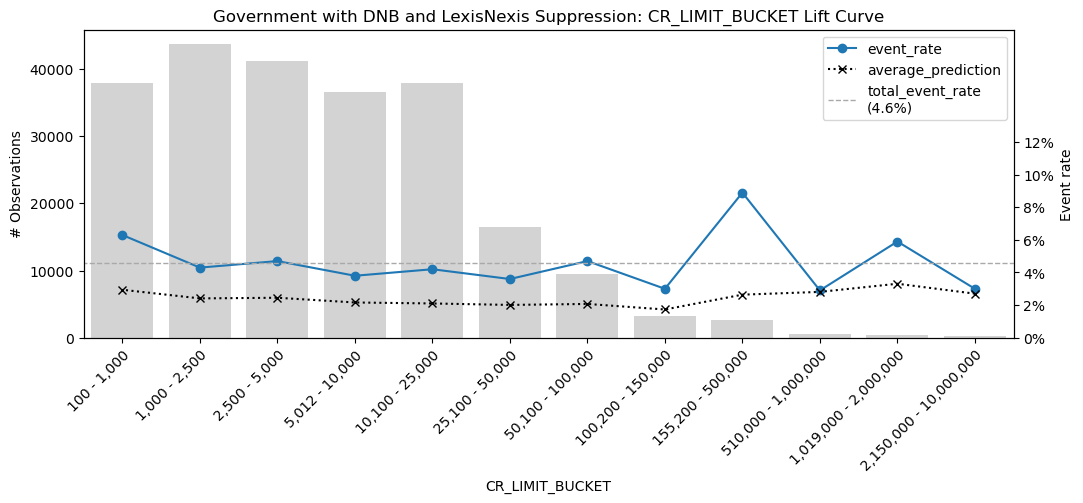

In [ ]:
mapping_dict = {0: 1000,
                1: 2500,
                3: 5000,
                4: 10000,
                5: 25000,
                6: 50000,
                7: 100000,
                8: 150000,
                9: 500000,
                10: 1000000,
                11: 2000000,
                12: np.inf
}

gov_suppressed_buckets = [-np.inf]
n = len(mapping_dict)

for m in mapping_dict:
    gov_suppressed_buckets.append(mapping_dict[m])

gov_dnb_ln_suppressed_decile_manual = calculate_decile_table_cl_bucket_manual(gov_dnb_ln_suppressed, 'y_pred_proba', gov_suppressed_buckets, n)
display(gov_dnb_ln_suppressed_decile_manual)

cr_limit_lift_curve('Government with DNB and LexisNexis Suppression', gov_dnb_ln_suppressed_decile_manual)

In [ ]:
# create over150k account from df_list['large_credit_limit'] with CR_LIMIT = 150k
# df_list['large_credit_limit']['CR_LIMIT'] = df_list['large_credit_limit']['CR_LIMIT'].astype(float)
equal_150k = df_list['large_credit_limit'][df_list['large_credit_limit']['CR_LIMIT'] == 150000]

# # aggregate CUST_ID count by REF_DATE and average y_pred_proba
# over150k_agg = over150k.groupby('REF_DATE').agg({'ID':'count', 'target':'mean', 'y_pred_proba':'mean'}).reset_index()

# # change REF_DATE to just date
# over150k_agg['REF_DATE'] = over150k_agg['REF_DATE'].dt.date
# over150k_agg

In [ ]:
calculate_decile_table_cl_bucket(equal_150k)

,CR_LIMIT_BUCKET,CR_LIMIT_RANGE,AVG_CL_LIMIT,PROB_RANGE,AVG_PROB,COUNT,DEFAULT_RATE,TOTAL_EVENT_RATE,CUM_COUNT,CUM_DEFAULT,CUM_PCT_DEFAULT,GAIN,LIFT,CUM_PCT_COUNT
9,1,"150,000 - 150,000",150000.0,0.001 - 0.898,0.0205,1452,0.025,0.02742,1452,36,0.090,0.090,0.900,10.003
8,2,"150,000 - 150,000",150000.0,0.001 - 0.881,0.0194,1451,0.029,0.02742,2903,78,0.196,0.196,0.980,20.000
7,3,"150,000 - 150,000",150000.0,0.001 - 0.765,0.0190,1452,0.034,0.02742,4355,127,0.319,0.319,1.063,30.003
6,4,"150,000 - 150,000",150000.0,0.001 - 0.911,0.0214,1451,0.019,0.02742,5806,154,0.387,0.387,0.968,40.000
5,5,"150,000 - 150,000",150000.0,0.001 - 0.746,0.0194,1451,0.025,0.02742,7257,190,0.477,0.477,0.954,49.997
4,6,"150,000 - 150,000",150000.0,0.001 - 0.678,0.0200,1452,0.023,0.02742,8709,224,0.563,0.563,0.938,60.000
3,7,"150,000 - 150,000",150000.0,0.001 - 0.924,0.0194,1451,0.032,0.02742,10160,270,0.678,0.678,0.969,69.997
2,8,"150,000 - 150,000",150000.0,0.001 - 0.881,0.0182,1452,0.024,0.02742,11612,305,0.766,0.766,0.957,80.000
1,9,"150,000 - 150,000",150000.0,0.001 - 0.965,0.0217,1451,0.031,0.02742,13063,350,0.879,0.879,0.977,89.997
0,10,"150,000 - 150,000",150000.0,0.001 - 0.970,0.0210,1452,0.033,0.02742,14515,398,1.000,1.000,1.000,100.000


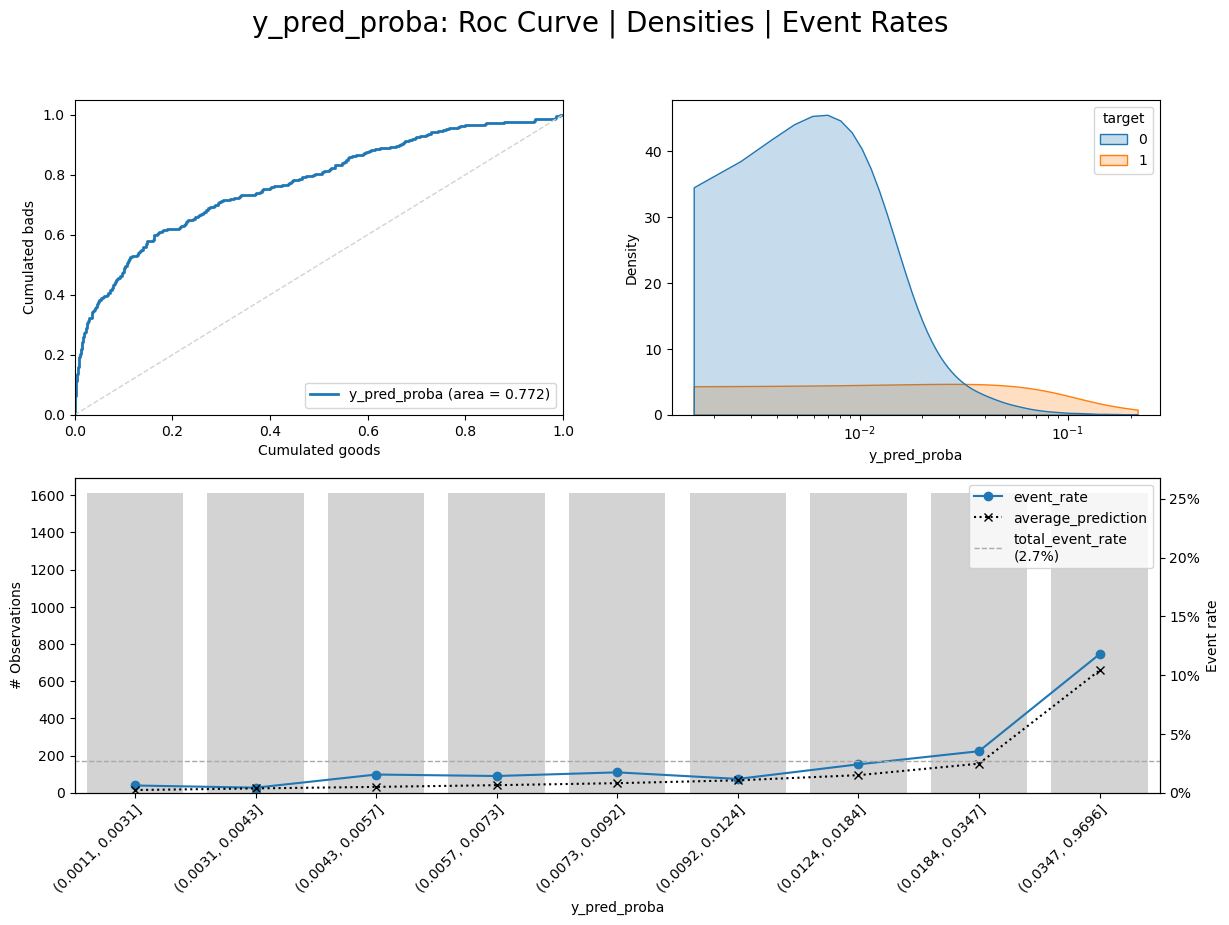

In [ ]:
metrics, fig = create_binary_target_plots(
    df=equal_150k,
    target_col="target",
    feature_col="y_pred_proba",
    n_bins=10,
    min_feature_val=None,
    max_feature_val=None,
    min_feature_q=None,
    max_feature_q=None,
    create_plot=True,
    invert_xaxis=False,
    use_quantiles=True,
    fillna=False,
    add_feature_means=True
)

In [ ]:
fpr['Government Suppressed'], tpr['Government Suppressed'], fpr_tpr_threshold['Government Suppressed'] = roc_curve(gov_dnb_ln_suppressed['target'], gov_dnb_ln_suppressed['y_pred_proba'])
roc_auc['Government Suppressed'] = auc(fpr['Government Suppressed'], tpr['Government Suppressed'])

# Calculate precision-recall curve and AUC
precision['Government Suppressed'], recall['Government Suppressed'], precision_recall_threshold['Government Suppressed'] = precision_recall_curve(gov_dnb_ln_suppressed['target'], gov_dnb_ln_suppressed['y_pred_proba'])
pr_auc['Government Suppressed'] = auc(recall['Government Suppressed'], precision['Government Suppressed'])
f1['Government Suppressed'] = 2*precision['Government Suppressed']*recall['Government Suppressed']/(precision['Government Suppressed']+recall['Government Suppressed'])

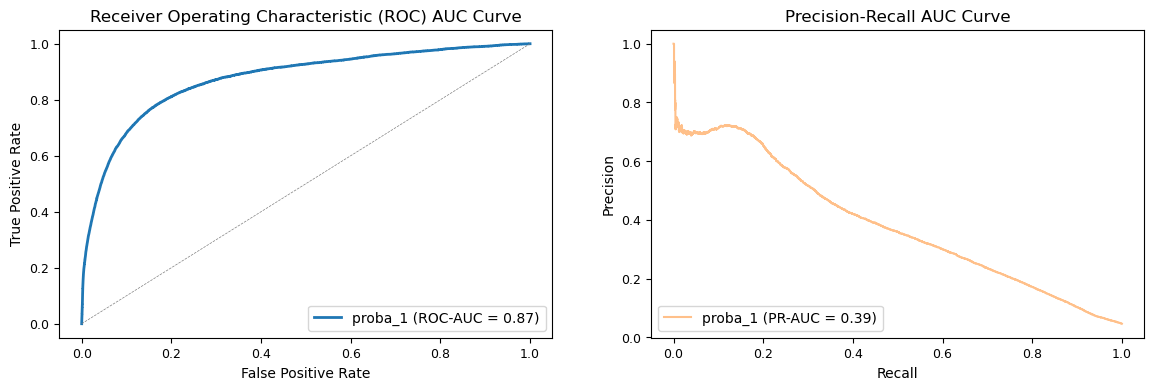

In [ ]:
roc_auc_pr_auc_plot('Government Suppressed')

In [ ]:
equal_150k.agg({'target':'mean', 'y_pred_proba':'mean'})

target          0.027420
y_pred_proba    0.019997
dtype: float64

In [ ]:
# count missing values for each column in df_list['inclusion']
df_list['inclusion'].isnull().sum()

In [ ]:
feature_list = ['A_NAICS_2_DIGIT_C', 'A_TENURE_MONTHS_N', 'A_FLAG_REVOLVER_B', 'A_YEARS_IN_BUSINESS_APP_N',
       'A_FLEET_SIZE_APP_N', 'D_SPREAD_EXPOSURE_6M_N',
       'D_MAX_DAYS_PAST_DUE_6M_N', 'D_MAX_EXPOSURE_1M_N', 'D_DAYS_SINCE_LAST_SUSPENSION_CURRENT_N', 'D_DAYS_SINCE_LAST_30DPD_CURRENT_N',
       'D_DAYS_PAST_DUE_CURRENT_N', 'D_SPREAD_FRAC_UNBILLED_6M_N', 'D_MAX_FRAC_UNBILLED_1M_N', 'D_MAX_DAYS_PAST_DUE_1M_N',
       'DNB_COMMERCIAL_CREDIT_SCORE_CURRENT_N', 'DNB_FINANCIAL_STRESS_SCORE_CURRENT_N', 'LN_LEXISNEXIS_SCORE_CURRENT_N', 'LN_LEXISNEXIS_SBFE_SCORE_CURRENT_N',
       'T_TOTAL_TRX_NON_FUEL_PROPORTION_1M_N', 'T_SPREAD_GROSS_SPEND_6M_N', 'T_SPREAD_TOTAL_TRX_6M_N', 'T_SUM_GALLONS_1M_N', 'T_SPREAD_SUM_GALLONS_6M_N',
]

In [ ]:
inclusion_na = df_list['inclusion'].copy()
inclusion_na = inclusion_na[feature_list]
inclusion_na = pd.DataFrame(inclusion_na.isna().sum())
inclusion_na.rename(columns={inclusion_na.columns[0]: 'count'}, inplace = True)

# inclusion_na_na = inclusion_na_na[inclusion_na_na['count'] != 0]
inclusion_na['pct_missing'] = inclusion_na['count']/df_list['inclusion'].shape[0]
# change pct_missing to x.xx% format
inclusion_na['pct_missing'] = inclusion_na['pct_missing'].apply(lambda x: '{:.1%}'.format(x))

# drop count column
inclusion_na = inclusion_na.drop(columns=['count'])

inclusion_na

,pct_missing
A_NAICS_2_DIGIT_C,0.0%
A_TENURE_MONTHS_N,0.0%
A_FLAG_REVOLVER_B,0.0%
A_YEARS_IN_BUSINESS_APP_N,61.8%
A_FLEET_SIZE_APP_N,54.6%
D_SPREAD_EXPOSURE_6M_N,0.1%
D_MAX_DAYS_PAST_DUE_6M_N,0.0%
D_MAX_EXPOSURE_1M_N,0.0%
D_DAYS_SINCE_LAST_SUSPENSION_CURRENT_N,68.0%
D_DAYS_SINCE_LAST_30DPD_CURRENT_N,91.9%


In [ ]:
gov_na = df_list['government'].copy()
gov_na = gov_na[feature_list]
gov_na = pd.DataFrame(gov_na.isna().sum())
gov_na.rename(columns={gov_na.columns[0]: 'count'}, inplace = True)

# gov_na_na = gov_na_na[gov_na_na['count'] != 0]
gov_na['pct_missing'] = gov_na['count']/df_list['government'].shape[0]
# change pct_missing to x.xx% format
gov_na['pct_missing'] = gov_na['pct_missing'].apply(lambda x: '{:.1%}'.format(x))

# drop count column
gov_na = gov_na.drop(columns=['count'])

gov_na

,pct_missing
A_NAICS_2_DIGIT_C,0.0%
A_TENURE_MONTHS_N,0.0%
A_FLAG_REVOLVER_B,0.0%
A_YEARS_IN_BUSINESS_APP_N,95.0%
A_FLEET_SIZE_APP_N,55.4%
D_SPREAD_EXPOSURE_6M_N,0.0%
D_MAX_DAYS_PAST_DUE_6M_N,0.0%
D_MAX_EXPOSURE_1M_N,0.0%
D_DAYS_SINCE_LAST_SUSPENSION_CURRENT_N,82.1%
D_DAYS_SINCE_LAST_30DPD_CURRENT_N,80.6%


In [ ]:
vip_na = df_list['vip_non_government'].copy()
vip_na = vip_na[feature_list]
vip_na = pd.DataFrame(vip_na.isna().sum())
vip_na.rename(columns={vip_na.columns[0]: 'count'}, inplace = True)

# vip_na_na = vip_na_na[vip_na_na['count'] != 0]
vip_na['pct_missing_vip'] = vip_na['count']/df_list['vip_non_government'].shape[0]
# change pct_missing to x.xx% format
vip_na['pct_missing_vip'] = vip_na['pct_missing_vip'].apply(lambda x: '{:.1%}'.format(x))

# drop count column
vip_na = vip_na.drop(columns=['count'])

vip_na

,pct_missing_vip
A_NAICS_2_DIGIT_C,0.0%
A_TENURE_MONTHS_N,0.0%
A_FLAG_REVOLVER_B,0.0%
A_YEARS_IN_BUSINESS_APP_N,83.5%
A_FLEET_SIZE_APP_N,71.1%
D_SPREAD_EXPOSURE_6M_N,0.1%
D_MAX_DAYS_PAST_DUE_6M_N,0.0%
D_MAX_EXPOSURE_1M_N,0.0%
D_DAYS_SINCE_LAST_SUSPENSION_CURRENT_N,76.5%
D_DAYS_SINCE_LAST_30DPD_CURRENT_N,88.7%


In [ ]:
efps_na = df_list['efps'].copy()
efps_na = efps_na[feature_list]
efps_na = pd.DataFrame(efps_na.isna().sum())
efps_na.rename(columns={efps_na.columns[0]: 'count'}, inplace = True)

# efps_na_na = efps_na_na[efps_na_na['count'] != 0]
efps_na['pct_missing_efps'] = efps_na['count']/df_list['efps'].shape[0]
# change pct_missing to x.xx% format
efps_na['pct_missing_efps'] = efps_na['pct_missing_efps'].apply(lambda x: '{:.1%}'.format(x))

# drop count column
efps_na = efps_na.drop(columns=['count'])

efps_na

,pct_missing_efps
A_NAICS_2_DIGIT_C,0.0%
A_TENURE_MONTHS_N,0.0%
A_FLAG_REVOLVER_B,0.0%
A_YEARS_IN_BUSINESS_APP_N,77.2%
A_FLEET_SIZE_APP_N,56.6%
D_SPREAD_EXPOSURE_6M_N,2.4%
D_MAX_DAYS_PAST_DUE_6M_N,0.0%
D_MAX_EXPOSURE_1M_N,0.0%
D_DAYS_SINCE_LAST_SUSPENSION_CURRENT_N,87.9%
D_DAYS_SINCE_LAST_30DPD_CURRENT_N,98.4%


In [ ]:
large_credit_limit_na = df_list['large_credit_limit'].copy()
large_credit_limit_na = large_credit_limit_na[feature_list]
large_credit_limit_na = pd.DataFrame(large_credit_limit_na.isna().sum())
large_credit_limit_na.rename(columns={large_credit_limit_na.columns[0]: 'count'}, inplace = True)

# large_credit_limit_na_na = large_credit_limit_na_na[large_credit_limit_na_na['count'] != 0]
large_credit_limit_na['pct_missing_large_credit_limit'] = large_credit_limit_na['count']/df_list['large_credit_limit'].shape[0]
# change pct_missing to x.xx% format
large_credit_limit_na['pct_missing_large_credit_limit'] = large_credit_limit_na['pct_missing_large_credit_limit'].apply(lambda x: '{:.1%}'.format(x))

# drop count column
large_credit_limit_na = large_credit_limit_na.drop(columns=['count'])

large_credit_limit_na

,pct_missing_large_credit_limit
A_NAICS_2_DIGIT_C,0.0%
A_TENURE_MONTHS_N,0.0%
A_FLAG_REVOLVER_B,0.0%
A_YEARS_IN_BUSINESS_APP_N,85.3%
A_FLEET_SIZE_APP_N,68.6%
D_SPREAD_EXPOSURE_6M_N,0.0%
D_MAX_DAYS_PAST_DUE_6M_N,0.0%
D_MAX_EXPOSURE_1M_N,0.0%
D_DAYS_SINCE_LAST_SUSPENSION_CURRENT_N,88.2%
D_DAYS_SINCE_LAST_30DPD_CURRENT_N,96.8%


In [ ]:
# join inclusion_na and gov_and_vip_na using index
missing_val = inclusion_na.join(gov_na, lsuffix='_inclusion', rsuffix='_gov')
missing_val = missing_val.join(vip_na)
missing_val = missing_val.join(efps_na)
missing_val = missing_val.join(large_credit_limit_na)

missing_val

,pct_missing_inclusion,pct_missing_gov,pct_missing_vip,pct_missing_efps,pct_missing_large_credit_limit
A_NAICS_2_DIGIT_C,0.0%,0.0%,0.0%,0.0%,0.0%
A_TENURE_MONTHS_N,0.0%,0.0%,0.0%,0.0%,0.0%
A_FLAG_REVOLVER_B,0.0%,0.0%,0.0%,0.0%,0.0%
A_YEARS_IN_BUSINESS_APP_N,61.8%,95.0%,83.5%,77.2%,85.3%
A_FLEET_SIZE_APP_N,54.6%,55.4%,71.1%,56.6%,68.6%
D_SPREAD_EXPOSURE_6M_N,0.1%,0.0%,0.1%,2.4%,0.0%
D_MAX_DAYS_PAST_DUE_6M_N,0.0%,0.0%,0.0%,0.0%,0.0%
D_MAX_EXPOSURE_1M_N,0.0%,0.0%,0.0%,0.0%,0.0%
D_DAYS_SINCE_LAST_SUSPENSION_CURRENT_N,68.0%,82.1%,76.5%,87.9%,88.2%
D_DAYS_SINCE_LAST_30DPD_CURRENT_N,91.9%,80.6%,88.7%,98.4%,96.8%


In [86]:
import sys
sys.path.append("C:/Users/w510663/Desktop/Pyri/connections/")
from conn import snowflake_conn

# Get execution time
st = time.time()

conn = snowflake_conn()
cur = conn.cursor()

cur.execute('''
    SELECT P.CUST_ID, P.REF_DATE, "model_prob" AS Y_PRED_PROBA, FE.FLAG_60_DPD_366_DAYS AS TARGET, CR_LIMIT
    FROM DATAIKU_ANALYTICS_SUB.RISK_FRAUD.PM_STAGE_L5_PREDICTIONS_V2 P
    LEFT JOIN DATAIKU_ANALYTICS_SUB.RISK_FRAUD.PM_FEATURE_TABLE FE
     ON P.CUST_ID = FE.CUST_ID AND P.SETID = FE.SETID AND P.REF_DATE = FE.REF_DATE
    LEFT JOIN DATAIKU_ANALYTICS_SUB.RISK_FRAUD.PM_STAGE_L0_CUSTOMER_FILTER_ATTRIBUTES_PERSIST L0
     ON P.CUST_ID = L0.CUST_ID AND P.SETID = L0.SETID AND P.REF_DATE = L0.REF_DATE
    WHERE SCORING_MODEL = 'FLAG_60_DPD_366_DAYS (INCL LEXISNEXIS)'
    AND P.REF_DATE::DATE >= '2018-03-01' AND P.REF_DATE::DATE <= '2021-12-01'
;
''')
training_df = pd.DataFrame.from_records(iter(cur), columns=[x[0] for x in cur.description])

et = time.time()
elapsed_time = et - st
print('Data Shape:', training_df.shape, 
      '\nExecution time:', elapsed_time / 60, 'minutes')

training_df.head()

Data Shape: (4445739, 5) 
Execution time: 0.7437318404515584 minutes


,CUST_ID,REF_DATE,Y_PRED_PROBA,TARGET,CR_LIMIT
0,9100006652539,2019-12-01,0.003546,0,1000.000
1,9100007931988,2020-09-01,0.013694,0,4500.000
2,9100003716073,2020-09-01,0.014107,0,47500.000
3,6300011086016,2018-06-01,0.002919,0,4250.000
4,0454007715261,2019-03-01,0.004330,0,49000.000


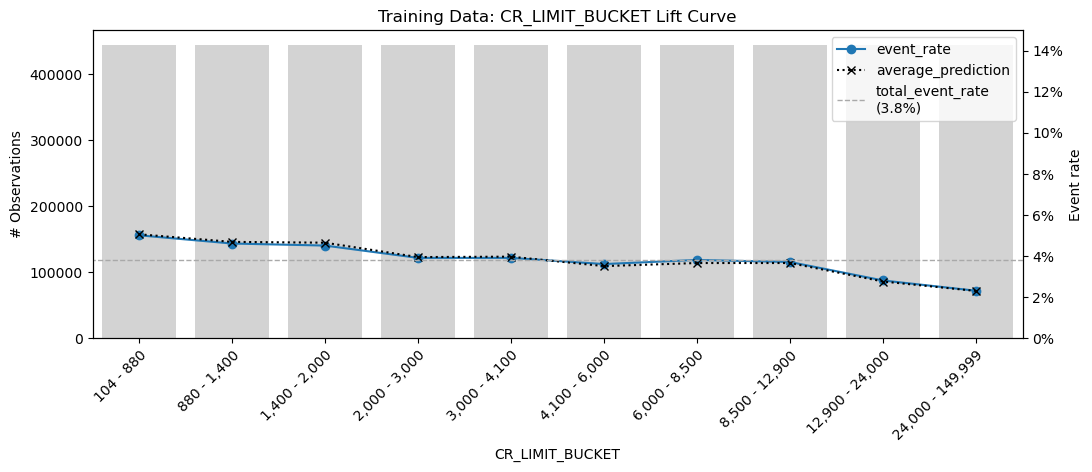

In [90]:
cr_limit_lift_curve("Training Data", training_df_decile)

In [87]:
#rename Y_PRED_PROBA AND TARGET to y_pred_proba and target
training_df = training_df.rename(columns={'Y_PRED_PROBA':'y_pred_proba', 'TARGET':'target'})

In [88]:
training_df_decile = calculate_decile_table_cl_bucket(training_df)
training_df_decile

,CR_LIMIT_BUCKET,CR_LIMIT_RANGE,AVG_CL_LIMIT,PROB_RANGE,AVG_PROB,COUNT,DEFAULT_RATE,TOTAL_EVENT_RATE,CUM_COUNT,CUM_DEFAULT,CUM_PCT_DEFAULT,GAIN,LIFT,CUM_PCT_COUNT
9,1,"24,000 - 149,999",47771.21,0.001 - 0.987,0.0229,444574,0.023,0.038159,444574,10406,0.061,0.061,0.610,10.0
8,2,"12,900 - 24,000",17311.93,0.001 - 0.989,0.0275,444574,0.028,0.038159,889148,22929,0.135,0.135,0.675,20.0
7,3,"8,500 - 12,900",10457.86,0.001 - 0.990,0.0365,444574,0.037,0.038159,1333722,39377,0.232,0.232,0.773,30.0
6,4,"6,000 - 8,500",7079.12,0.001 - 0.991,0.0365,444574,0.038,0.038159,1778296,56095,0.331,0.331,0.828,40.0
5,5,"4,100 - 6,000",4969.63,0.001 - 0.989,0.0350,444573,0.036,0.038159,2222869,72017,0.425,0.425,0.850,50.0
4,6,"3,000 - 4,100",3527.41,0.001 - 0.987,0.0396,444574,0.039,0.038159,2667443,89454,0.527,0.527,0.878,60.0
3,7,"2,000 - 3,000",2508.69,0.001 - 0.986,0.0394,444574,0.039,0.038159,3112017,106858,0.630,0.630,0.900,70.0
2,8,"1,400 - 2,000",1726.86,0.001 - 0.985,0.0464,444574,0.045,0.038159,3556591,126901,0.748,0.748,0.935,80.0
1,9,"880 - 1,400",1099.20,0.001 - 0.986,0.0468,444574,0.046,0.038159,4001165,147296,0.868,0.868,0.964,90.0
0,10,104 - 880,583.38,0.001 - 0.984,0.0505,444574,0.050,0.038159,4445739,169643,1.000,1.000,1.000,100.0


In [ ]:
import datetime as dt

df_list['inclusion']['REF_DATE'] = pd.to_datetime(df_list['inclusion']['REF_DATE'], utc=True)
inclusion_2022 = df_list['inclusion'][df_list['inclusion']['REF_DATE'].dt.year == 2022]

df_list['gov']['REF_DATE'] = pd.to_datetime(df_list['gov']['REF_DATE'], utc=True)
gov_2022 = df_list['gov'][df_list['gov']['REF_DATE'].dt.year == 2022]

df_list['vip']['REF_DATE'] = pd.to_datetime(df_list['vip']['REF_DATE'], utc=True)
vip_2022 = df_list['vip'][df_list['vip']['REF_DATE'].dt.year == 2022]

df_list['efps']['REF_DATE'] = pd.to_datetime(df_list['efps']['REF_DATE'], utc=True)
efps_2022 = df_list['efps'][df_list['efps']['REF_DATE'].dt.year == 2022]

df_list['large_credit_limit']['REF_DATE'] = pd.to_datetime(df_list['large_credit_limit']['REF_DATE'], utc=True)
large_credit_limit_2022 = df_list['large_credit_limit'][df_list['large_credit_limit']['REF_DATE'].dt.year == 2022]


In [ ]:
inclusion_2022_decile = calculate_decile_table_cl_bucket(inclusion_2022)
gov_2022_decile = calculate_decile_table_cl_bucket(gov_2022)
vip_2022_decile = calculate_decile_table_cl_bucket(vip_2022)
efps_2022_decile = calculate_decile_table_cl_bucket(efps_2022)
large_credit_limit_2022_decile = calculate_decile_table_cl_bucket(large_credit_limit_2022)

In [ ]:
cr_limit_lift_curve('Inclusion 2022 Data', inclusion_2022_decile)

In [ ]:
cr_limit_lift_curve('GOV 2022 Data', gov_2022_decile)

In [ ]:
cr_limit_lift_curve('VIP 2022 Data', vip_2022_decile)

In [ ]:
cr_limit_lift_curve('EFPS 2022 Data', efps_2022_decile)

In [ ]:
cr_limit_lift_curve('Large Credit Limit 2022 Data', large_credit_limit_2022_decile)